<div style="display:fill;
           background-color:#89B9AD88;
           letter-spacing:0.5px;border-bottom: 2px solid black;">
<img src="machine-learning.jpg">
    
<h1 style="padding: 12px; color:black; font-weight:600;font-family: 'Garamond', 'Lucida Sans', sans-serif; text-align: center; font-size: 32px;text-transform: uppercase;"> Oil, Gas and Water Prediction</h1>
</div>

<div style="background-color: #89B9AD88; padding: 12px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 32px;">
    📝 Table of Contents
    </h1>
</div>
<br>
<a href="#1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 1. Dataset Overview </a><br>
<a href="#2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 2. Data Preprocessing  </a><br>
<a href="#3" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 3. Exploaratory Data Analysis </a><br>
<a href="#4" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 4. Feature Engineering </a><br>
<a href="#4.1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 14px;padding-left: 25px;"> 4.1 Feature Transformation </a><br>
<a href="#4.2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 14px;padding-left: 25px;"> 4.2 Data Time Feature Engineering  </a><br>
<a href="#4.3" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 14px;padding-left: 25px;"> 4.3 Implementation of Feature Transformation </a><br>
<a href="#4.4" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 14px;padding-left: 25px;"> 4.4 Feature Scaling </a><br>
<a href="#4" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 5. Models Training </a><br>
<a href="#4" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 6.Hyperparameters Turning  </a><br>
<a href="#4" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 7.Models Optimization   </a><br>
<a href="#4" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 8.Voting Regressor   </a><br>
<a href="#7" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 9.  Prediction And Creating 'submission.csv' </a><br>
<a href="#8" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 10. Conclusion </a>

<div id="1" style="background-color: #89B9AD88; padding: 12px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 32;">
   📚 Dataset Overview
    </h1>
</div>

🥽🥽ATTRIBUTE INFORMATION

Features (Independent variables)
1.N_WELL_BORE_CODE: A unique identifier for each wellbore.
2.WellBore Name: The name of the wellbore.
3.Downhole Pressure (PSI): The pressure measured at the bottom of the wellbore
4.Downhole Temperature (Kelvin): The temperature measured at the bottom of the wellbore
5.Average Tubing Pressure: The average pressure within the production tubing
6.Annulus Pressure (PSI): The pressure in the annular space between the tubing and the casing.
7.AVG WHP (PSI): The average wellhead pressure
8.Choke Size: The size of the choke used to control the flow rate of the well.

Outputs (Dependent variables) 
9. Oil Production (stb/day): The volume of oil produced per day
10. Gas Volume (scf/day): The volume of gas produced per day. 
11. Water Production (stb/day): : The volume of water produced per day

NOTE TO ENSURE THAT ALL THE CODES BELOW RUN ON YOUR LOCAL MACHINE KINDLY INSTALL THE FOLLOWING
!pip install catboost
!pip install datasist
!pip install xgboost
!pip install lightgbm


### IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',100)
import datasist as ds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
figure_size = ( 20, 5)
import warnings
warnings.filterwarnings('ignore')



In [2]:
##READING THE TRAINING AND VALIDATION DATASETS
df= pd.read_csv('1718516767251_dseats_2024_training_dataset.csv')
test = pd.read_csv("1718516759391_dseats_2024_validation_dataset.csv")

In [3]:
df

PRODUCTION DATE Field Name    WELL_BORE_CODE  N_WELL_BORE_CODE  \
0     07/04/2014 00:00      DSEAT   DSEAT-001-F-1 C               105   
1     08/04/2014 00:00      DSEAT   DSEAT-001-F-1 C               105   
2     09/04/2014 00:00      DSEAT   DSEAT-001-F-1 C               105   
3     10/04/2014 00:00      DSEAT   DSEAT-001-F-1 C               105   
4     11/04/2014 00:00      DSEAT   DSEAT-001-F-1 C               105   
...                ...        ...               ...               ...   
6920  26/06/2015 00:00      DSEAT  DSEAT-001-F-15 D               109   
6921  27/06/2015 00:00      DSEAT  DSEAT-001-F-15 D               109   
6922  28/06/2015 00:00      DSEAT  DSEAT-001-F-15 D               109   
6923  29/06/2015 00:00      DSEAT  DSEAT-001-F-15 D               109   
6924  30/06/2015 00:00      DSEAT  DSEAT-001-F-15 D               109   

     WellBore Name   FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0        001-F-1 C  production        OP                 0.000000   
1        001-F-1 C  production        OP                 0.000000   
2        001-F-1 C  production        OP                 0.000000   
3        001-F-1 C  production        OP                 0.000000   
4        001-F-1 C  production        OP              4500.454030   
...            ...         ...       ...                      ...   
6920    001-F-15 D  production        OP              2903.229117   
6921    001-F-15 D  production        OP              2905.030564   
6922    001-F-15 D  production        OP              2928.389988   
6923    001-F-15 D  production        OP              2939.874982   
6924    001-F-15 D  production        OP              2915.465730   

      Downhole Temperature (Kelvin)  Average Tubing Pressure  \
0                        273.150000                 0.000000   
1                        273.150000                 0.000000   
2                        273.150000                 0.000000   
3                        273.150000                 0.000000   
4                        370.025890              4020.534770   
...                             ...                      ...   
6920                     379.373252              2460.629972   
6921                     379.379814              2456.159205   
6922                     379.313739              2484.425946   
6923                     379.288114              2496.000496   
6924                     379.366109              2469.645737   

      Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
0                   0.000000       0.000000    0.000000   
1                   0.000000       0.000000    0.000000   
2                   0.000000       0.000000    0.000000   
3                   0.000000       0.000000    0.000000   
4                   0.000000     479.919260   33.071950   
...                      ...            ...         ...   
6920              182.554483     442.599145    1.880480   
6921              184.106427     448.871358    2.120109   
6922              175.609150     443.964042    1.980460   
6923              173.255362     443.874486    1.692930   
6924              182.891962     445.819994    2.080569   

      Oil Production (stb/day)  Gas Volume (scf/day)  \
0                       0.0000                 0.000   
1                       0.0000                 0.000   
2                       0.0000                 0.000   
3                       0.0000                 0.000   
4                       0.0000                 0.000   
...                        ...                   ...   
6920                  747.8181            614123.984   
6921                  749.2019            614168.462   
6922                  789.9611            648175.070   
6923                  789.7724            637067.219   
6924                  802.9814            642509.067   

      Water Production (stb/day)  
0                         0.0000  
1                         0.0000  
2                         0.0000  
3         

In [4]:
test

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE  \
0     2015-07-01 00:00:00      DSEAT  DSEAT-001-F-1 C             105.0   
1     2015-07-02 00:00:00      DSEAT  DSEAT-001-F-1 C             105.0   
2     2015-07-03 00:00:00      DSEAT  DSEAT-001-F-1 C             105.0   
3     2015-07-04 00:00:00      DSEAT  DSEAT-001-F-1 C             105.0   
4     2015-07-05 00:00:00      DSEAT  DSEAT-001-F-1 C             105.0   
...                   ...        ...              ...               ...   
9915                  NaN        NaN              NaN               NaN   
9916                  NaN        NaN              NaN               NaN   
9917                  NaN        NaN              NaN               NaN   
9918                  NaN        NaN              NaN               NaN   
9919                  NaN        NaN              NaN               NaN   

     WellBore Name   FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0        001-F-1 C  production        OP              3061.253047   
1        001-F-1 C  production        OP              3247.951135   
2        001-F-1 C  production        OP              3333.012485   
3        001-F-1 C  production        OP              3404.022465   
4        001-F-1 C  production        OP              3465.473030   
...            ...         ...       ...                      ...   
9915           NaN         NaN       NaN                      NaN   
9916           NaN         NaN       NaN                      NaN   
9917           NaN         NaN       NaN                      NaN   
9918           NaN         NaN       NaN                      NaN   
9919           NaN         NaN       NaN                      NaN   

      Downhole Temperature (Kelvin)  Average Tubing Pressure  \
0                        380.665745              2659.809580   
1                        376.759980              2547.453670   
2                        375.985300              2533.912265   
3                        375.419010              2481.804485   
4                        375.004710              2408.310945   
...                             ...                      ...   
9915                            NaN                      NaN   
9916                            NaN                      NaN   
9917                            NaN                      NaN   
9918                            NaN                      NaN   
9919                            NaN                      NaN   

      Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
0                        0.0     401.443468    0.491632   
1                        0.0     700.497465   21.775180   
2                        0.0     799.100220   27.638780   
3                        0.0     922.217980   36.178940   
4                        0.0    1057.162085   45.424140   
...                      ...            ...         ...   
9915                     NaN            NaN         NaN   
9916                     NaN            NaN         NaN   
9917                     NaN            NaN         NaN   
9918                     NaN            NaN         NaN   
9919                     NaN            NaN         NaN   

      Oil Production (stb/day)  Gas Volume (scf/day)  \
0                          NaN                   NaN   
1                          NaN                   NaN   
2                          NaN                   NaN   
3                          NaN                   NaN   
4                          NaN                   NaN   
...                        ...                   ...   
9915                       NaN                   NaN   
9916                       NaN                   NaN   
9917                       NaN                   NaN   
9918                       NaN                   NaN   
9919                       NaN                   NaN   

      Water Production (stb/day)  
0                            NaN  
1                            NaN  
2                       

<div id="3" style="background-color: #89B9AD88; padding: 12px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 32px;">
   🧪 Data Preprocessing
    </h1>
</div>


In [5]:
print (f" Our traning dataset contains {df.shape[0]} rows and {df.shape[1]} columns" )
print (f" Our validation dataset contains {test.shape[0]} rows and {test.shape[1]} columns" )

 Our traning dataset contains 6925 rows and 16 columns
 Our validation dataset contains 9920 rows and 16 columns


In [6]:
##NAME OF COLUMNS IN TRAINING DATASET 
df.columns.tolist()

['PRODUCTION DATE',
 'Field Name',
 'WELL_BORE_CODE',
 'N_WELL_BORE_CODE',
 'WellBore Name',
 'FLOW_KIND',
 'WELL_TYPE',
 'Downhole Pressure (PSI)',
 'Downhole Temperature (Kelvin)',
 'Average Tubing Pressure',
 'Annulus Pressure (PSI)',
 'AVG WHP (PSI)',
 'Choke Size',
 'Oil Production (stb/day)',
 'Gas Volume (scf/day)',
 'Water Production (stb/day)']

In [7]:
#BRIEF SUMMARY OF THE OUR TRAINING AND THE VALIDATION DATASET
data= pd.DataFrame()
def summary (DF):
  
    #data= pd.DataFrame()
    data['Data_type'] = DF.dtypes
    data['Null_value'] = DF.isna().sum()
    data['Duplicates_Value'] = DF.duplicated().sum()
    data['Min_value'] = DF.min()
    data['Max_value'] = DF.max()
    data['Unique_value'] = DF.nunique()
    return data

summary(df)

Data_type  Null_value  Duplicates_Value  \
PRODUCTION DATE                  object           0                 0   
Field Name                       object           0                 0   
WELL_BORE_CODE                   object           0                 0   
N_WELL_BORE_CODE                  int64           0                 0   
WellBore Name                    object           0                 0   
FLOW_KIND                        object           0                 0   
WELL_TYPE                        object           0                 0   
Downhole Pressure (PSI)         float64           0                 0   
Downhole Temperature (Kelvin)   float64           0                 0   
Average Tubing Pressure         float64           0                 0   
Annulus Pressure (PSI)          float64           0                 0   
AVG WHP (PSI)                   float64           0                 0   
Choke Size                      float64           6                 0   
Oil Production (stb/day)        float64           0                 0   
Gas Volume (scf/day)            float64           0                 0   
Water Production (stb/day)      float64           0                 0   

                                      Min_value         Max_value  \
PRODUCTION DATE                01/01/2009 00:00  31/12/2014 00:00   
Field Name                                DSEAT             DSEAT   
WELL_BORE_CODE                  DSEAT-001-F-1 C  DSEAT-001-F-15 D   
N_WELL_BORE_CODE                            105               109   
WellBore Name                         001-F-1 C        001-F-15 D   
FLOW_KIND                            production        production   
WELL_TYPE                                    OP                WI   
Downhole Pressure (PSI)                     0.0       4606.666675   
Downhole Temperature (Kelvin)            273.15        381.652178   
Average Tubing Pressure                     0.0       4592.612695   
Annulus Pressure (PSI)                      0.0        435.287508   
AVG WHP (PSI)                               0.0       1991.009935   
Choke Size                                  0.0         125.71857   
Oil Production (stb/day)                    0.0        37122.5736   
Gas Volume (scf/day)                        0.0       30044942.66   
Water Production (stb/day)           -2879.8136        50444.1646   

                               Unique_value  
PRODUCTION DATE                        2611  
Field Name                                1  
WELL_BORE_CODE                            5  
N_WELL_BORE_CODE                          5  
WellBore Name                             5  
FLOW_KIND                                 1  
WELL_TYPE                                 2  
Downhole Pressure (PSI)                5050  
Downhole Temperature (Kelvin)          4983  
Average Tubing Pressure                6710  
Annulus Pressure (PSI)                 4800  
AVG WHP (PSI)                          6713  
Choke Size                             6856  
Oil Production (stb/day)               6144  
Gas Volume (scf/day)                   6240  
Water Production (stb/day)             5643

In [8]:
summary(test)

Data_type  Null_value  Duplicates_Value  \
PRODUCTION DATE                  object        7845              7844   
Field Name                       object        7845              7844   
WELL_BORE_CODE                   object        7845              7844   
N_WELL_BORE_CODE                float64        7845              7844   
WellBore Name                    object        7845              7844   
FLOW_KIND                        object        7845              7844   
WELL_TYPE                        object        7845              7844   
Downhole Pressure (PSI)         float64        7845              7844   
Downhole Temperature (Kelvin)   float64        7845              7844   
Average Tubing Pressure         float64        7845              7844   
Annulus Pressure (PSI)          float64        7845              7844   
AVG WHP (PSI)                   float64        7845              7844   
Choke Size                      float64        7845              7844   
Oil Production (stb/day)        float64        9920              7844   
Gas Volume (scf/day)            float64        9920              7844   
Water Production (stb/day)      float64        9920              7844   

                               Min_value    Max_value  Unique_value  
PRODUCTION DATE                      NaN          NaN           445  
Field Name                           NaN          NaN             1  
WELL_BORE_CODE                       NaN          NaN             5  
N_WELL_BORE_CODE                  105.00   109.000000             5  
WellBore Name                        NaN          NaN             5  
FLOW_KIND                            NaN          NaN             1  
WELL_TYPE                            NaN          NaN             1  
Downhole Pressure (PSI)             0.00  5765.033975          1518  
Downhole Temperature (Kelvin)     273.15   381.442244          1486  
Average Tubing Pressure             0.00  5015.648165          1975  
Annulus Pressure (PSI)              0.00   413.071107          1689  
AVG WHP (PSI)                       0.00  1819.765515          1964  
Choke Size                          0.00   109.781900          2050  
Oil Production (stb/day)             NaN          NaN             0  
Gas Volume (scf/day)                 NaN          NaN             0  
Water Production (stb/day)           NaN          NaN             0

In [9]:
#LET US CONVERT PRDUCTION DATE TO A DATETIME COLUMN
df['PRODUCTION DATE'] = pd.to_datetime(df['PRODUCTION DATE'])
test['PRODUCTION DATE'] = pd.to_datetime(test['PRODUCTION DATE'])

In [10]:
df_count = df.dtypes.value_counts()
test_count  = test.dtypes.value_counts()
print (f" Our training dataset contains {df_count[0]} numerical columns and {df_count[1]} categorical columns. ")
print (f" Our validation dataset contains {test_count[0]} numerical columns and {test_count[1]} categorical columns. ")
print(f"No duplicate value was found in the trainig dataset.")

 Our training dataset contains 9 numerical columns and 5 categorical columns. 
 Our validation dataset contains 10 numerical columns and 5 categorical columns. 
No duplicate value was found in the trainig dataset.


In [11]:
#MISSING VALUE percentage (%) 
display (ds.structdata.display_missing(test))
display (ds.structdata.display_missing(df) )

features  missing_counts  missing_percent
0                 PRODUCTION DATE            7845             79.1
1                      Field Name            7845             79.1
2                  WELL_BORE_CODE            7845             79.1
3                N_WELL_BORE_CODE            7845             79.1
4                   WellBore Name            7845             79.1
5                       FLOW_KIND            7845             79.1
6                       WELL_TYPE            7845             79.1
7         Downhole Pressure (PSI)            7845             79.1
8   Downhole Temperature (Kelvin)            7845             79.1
9         Average Tubing Pressure            7845             79.1
10         Annulus Pressure (PSI)            7845             79.1
11                  AVG WHP (PSI)            7845             79.1
12                     Choke Size            7845             79.1
13       Oil Production (stb/day)            9920            100.0
14           Gas Volume (scf/day)            9920            100.0
15     Water Production (stb/day)            9920            100.0

features  missing_counts  missing_percent
0                 PRODUCTION DATE               0              0.0
1                      Field Name               0              0.0
2                  WELL_BORE_CODE               0              0.0
3                N_WELL_BORE_CODE               0              0.0
4                   WellBore Name               0              0.0
5                       FLOW_KIND               0              0.0
6                       WELL_TYPE               0              0.0
7         Downhole Pressure (PSI)               0              0.0
8   Downhole Temperature (Kelvin)               0              0.0
9         Average Tubing Pressure               0              0.0
10         Annulus Pressure (PSI)               0              0.0
11                  AVG WHP (PSI)               0              0.0
12                     Choke Size               6              0.1
13       Oil Production (stb/day)               0              0.0
14           Gas Volume (scf/day)               0              0.0
15     Water Production (stb/day)               0              0.0

In THE TRIANING DATASET THERE IS ONLY 0.1% OF VALUE MISSING WHILE THE TEST DATASET HAS 79.1% VALUES MISSING
let us dropp all the missing values in the validation dataset and use mean imputation in the training set.

In [12]:
#IMPUTATION OF MISSING VALUES IN THE TRAINING DATASET AND  THE VALIDATION DATASET

test = test.drop(columns= ['Oil Production (stb/day)', 'Gas Volume (scf/day)' ,'Water Production (stb/day)'])
df['Choke Size'] = df['Choke Size'].fillna(df['Choke Size'].mean() )
test = test.dropna()

In [13]:
#AFTER TREATMENT OF MISSING VALUES
display (ds.structdata.display_missing(test))
display (ds.structdata.display_missing(df) ) 

features  missing_counts  missing_percent
0                 PRODUCTION DATE               0              0.0
1                      Field Name               0              0.0
2                  WELL_BORE_CODE               0              0.0
3                N_WELL_BORE_CODE               0              0.0
4                   WellBore Name               0              0.0
5                       FLOW_KIND               0              0.0
6                       WELL_TYPE               0              0.0
7         Downhole Pressure (PSI)               0              0.0
8   Downhole Temperature (Kelvin)               0              0.0
9         Average Tubing Pressure               0              0.0
10         Annulus Pressure (PSI)               0              0.0
11                  AVG WHP (PSI)               0              0.0
12                     Choke Size               0              0.0

features  missing_counts  missing_percent
0                 PRODUCTION DATE               0              0.0
1                      Field Name               0              0.0
2                  WELL_BORE_CODE               0              0.0
3                N_WELL_BORE_CODE               0              0.0
4                   WellBore Name               0              0.0
5                       FLOW_KIND               0              0.0
6                       WELL_TYPE               0              0.0
7         Downhole Pressure (PSI)               0              0.0
8   Downhole Temperature (Kelvin)               0              0.0
9         Average Tubing Pressure               0              0.0
10         Annulus Pressure (PSI)               0              0.0
11                  AVG WHP (PSI)               0              0.0
12                     Choke Size               0              0.0
13       Oil Production (stb/day)               0              0.0
14           Gas Volume (scf/day)               0              0.0
15     Water Production (stb/day)               0              0.0

In [14]:
#UNIQUE VALUE IN EACH COLUMN  (DF)
for col in df.columns:
    unique = df[col].nunique()
    print(f"The training dataset {col} has:  {unique} value(s)")

The training dataset PRODUCTION DATE has:  2611 value(s)
The training dataset Field Name has:  1 value(s)
The training dataset WELL_BORE_CODE has:  5 value(s)
The training dataset N_WELL_BORE_CODE has:  5 value(s)
The training dataset WellBore Name has:  5 value(s)
The training dataset FLOW_KIND has:  1 value(s)
The training dataset WELL_TYPE has:  2 value(s)
The training dataset Downhole Pressure (PSI) has:  5050 value(s)
The training dataset Downhole Temperature (Kelvin) has:  4983 value(s)
The training dataset Average Tubing Pressure has:  6710 value(s)
The training dataset Annulus Pressure (PSI) has:  4800 value(s)
The training dataset AVG WHP (PSI) has:  6713 value(s)
The training dataset Choke Size has:  6857 value(s)
The training dataset Oil Production (stb/day) has:  6144 value(s)
The training dataset Gas Volume (scf/day) has:  6240 value(s)
The training dataset Water Production (stb/day) has:  5643 value(s)


In [15]:
#UNIQUE VALUE IN EACH COLUMN  (TEST)
for col in test.columns:
    unique = test[col].nunique()
    print(f"The validation dataset {col} has:  {unique} value(s)")

The validation dataset PRODUCTION DATE has:  445 value(s)
The validation dataset Field Name has:  1 value(s)
The validation dataset WELL_BORE_CODE has:  5 value(s)
The validation dataset N_WELL_BORE_CODE has:  5 value(s)
The validation dataset WellBore Name has:  5 value(s)
The validation dataset FLOW_KIND has:  1 value(s)
The validation dataset WELL_TYPE has:  1 value(s)
The validation dataset Downhole Pressure (PSI) has:  1518 value(s)
The validation dataset Downhole Temperature (Kelvin) has:  1486 value(s)
The validation dataset Average Tubing Pressure has:  1975 value(s)
The validation dataset Annulus Pressure (PSI) has:  1689 value(s)
The validation dataset AVG WHP (PSI) has:  1964 value(s)
The validation dataset Choke Size has:  2050 value(s)


In [16]:
display('TRAINING DATA', df['WELL_TYPE'].value_counts())
display('VALIDATION DATA', test['WELL_TYPE'].value_counts())

'TRAINING DATA'

OP    6924
WI       1
Name: WELL_TYPE, dtype: int64

'VALIDATION DATA'

OP    2075
Name: WELL_TYPE, dtype: int64

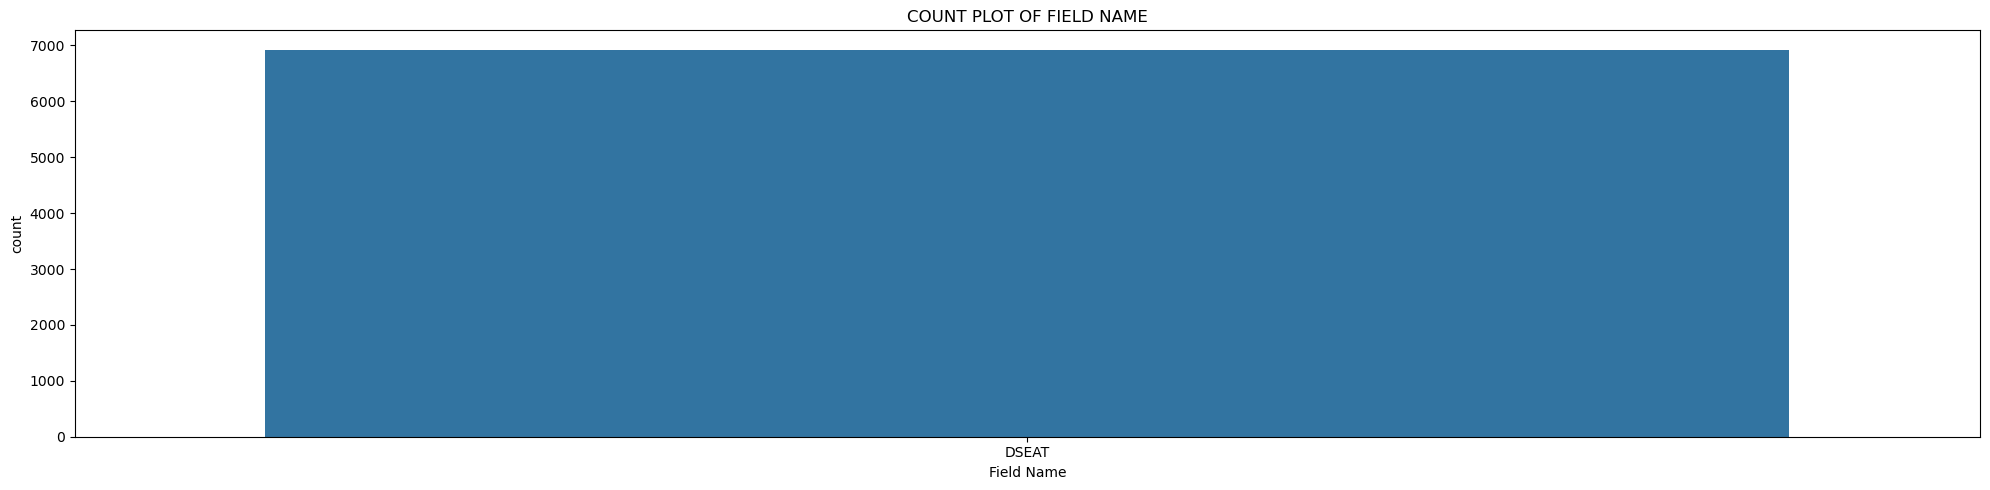

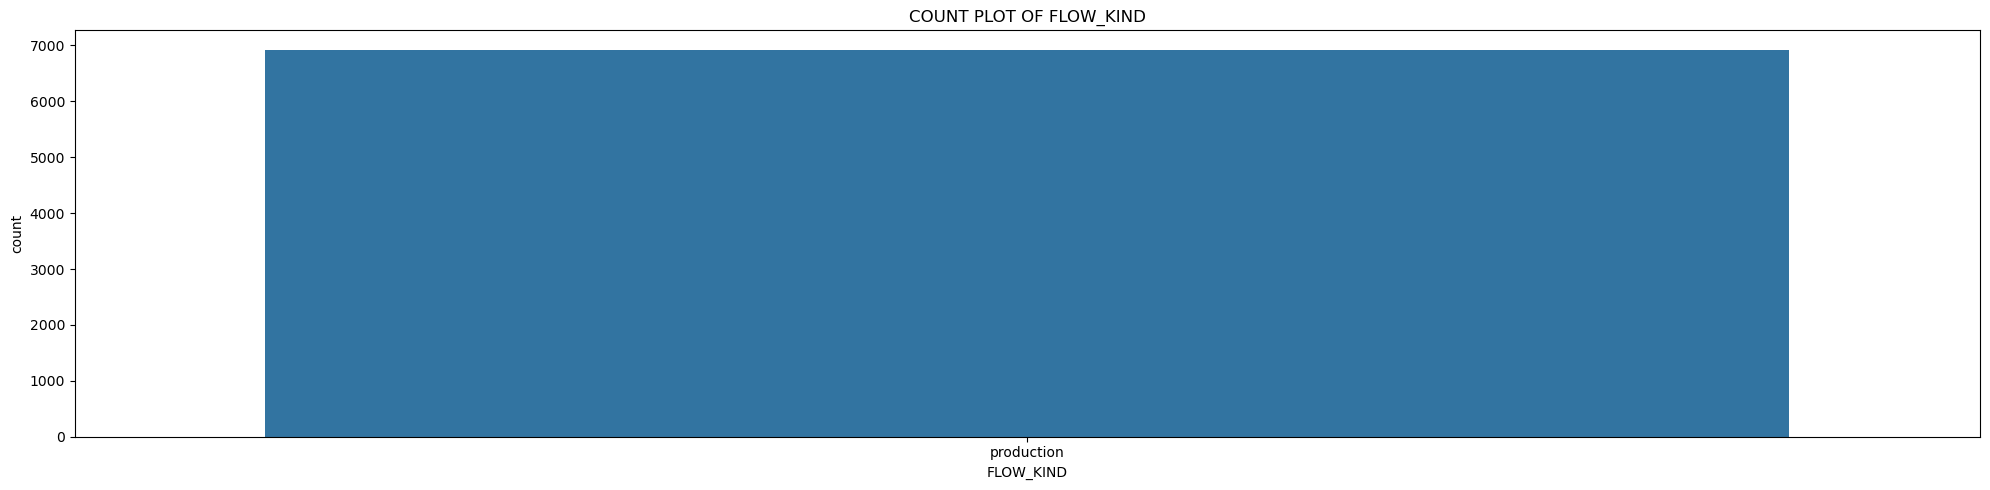

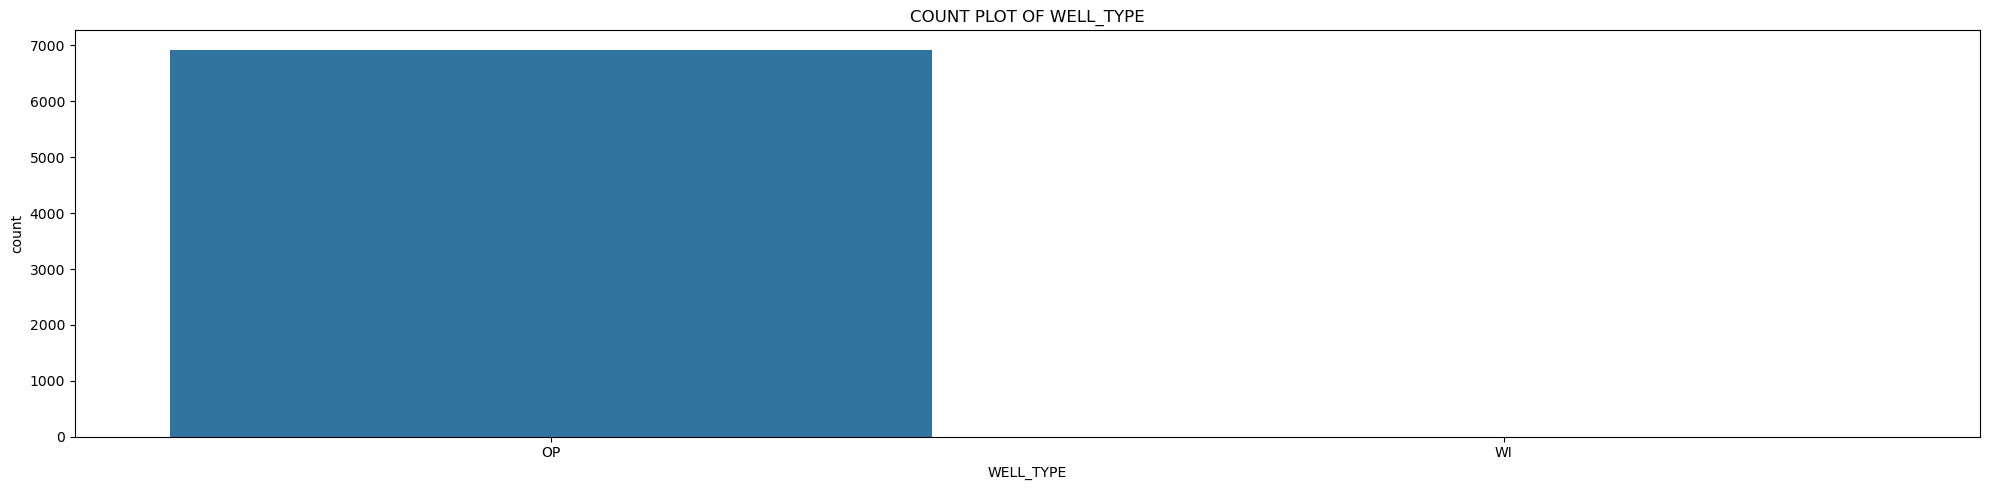

In [17]:
redudants = ['Field Name', 'FLOW_KIND', 'WELL_TYPE'] 
for col in redudants:
    plt.figure(figsize= figure_size)
    plt.title(f"COUNT PLOT OF {col}".upper())
    sns.countplot(x = df[col])
    plt.tight_layout()
    plt.show()

HERE WE CAN CLEARLY SEE THAT :
Field Name contains a unique value (DSAET) throughtout the column,
FLOW_KIND  contains a unique value (production) throughtout the column while,
WELL_TYPE contains 2 differents values (OP, WI) but WI is very negligegble. 
Therefore we will drop the mention columns because they will serve as noise in the process of building
our machine learning model. 

In [18]:
#LET US GIVE A CLOSER LOOK TO 'WELL_BORE_CODE', 'WellBore Name' COLUMNS
df[['WELL_BORE_CODE', 'WellBore Name']].value_counts()

WELL_BORE_CODE    WellBore Name
DSEAT-001-F-12 H  001-F-12         2611
DSEAT-001-F-14 H  001-F-14         2611
DSEAT-001-F-11 H  001-F-11          720
DSEAT-001-F-15 D  001-F-15 D        533
DSEAT-001-F-1 C   001-F-1 C         450
dtype: int64

'WELL_BORE_CODE' CONTAINS THE WORD 'DSEAT' FOLLOW BY THE VALUES IN THE 'WELLBORE NAME'. 
'WELL_BORE_CODE' AND 'WellBore Name' ARE GIVINING US THE SAME INFORMATION 
HENCE WE WILL DROP 'WELL_BORE_CODE' COLUMNS.

In [19]:
#N_WELL_BORE_CODE: A unique identifier for each wellbore
#THIS COLUMN WILL BE TREATED AS A CATEGORICAL COLUMN 
df['N_WELL_BORE_CODE'] = df['N_WELL_BORE_CODE'].astype('object')
test['N_WELL_BORE_CODE'] = test['N_WELL_BORE_CODE'].astype('object')


##LET US DROP THE REDUDANDT COLUMNS USING THE FUNCTION BELOW
def drop_redudant (data):
    data= data.drop(columns = ['Field Name', 'FLOW_KIND', 'WELL_TYPE', 'WELL_BORE_CODE']  )
    return data

df = drop_redudant(df)
test = drop_redudant(test)

In [20]:
#SOME NEGATIVE VALUES WERE OBSERVED IN THE WATER PRODUCTION COLUMNS WHICH SEEM TO BE ABNORMAL
neg_prod = [ ]
for val in df ['Water Production (stb/day)']:
    if val < 0 :
        neg_prod.append(val)
        
neg_prod 

[-89.2551, -2879.8136, -5.9755, -372.3051]

In [21]:
df[df['Water Production (stb/day)'] < 0 ]

PRODUCTION DATE N_WELL_BORE_CODE WellBore Name  Downhole Pressure (PSI)  \
1241      2008-04-23              107      001-F-12              3778.090061   
2761      2012-08-13              107      001-F-12                 0.000000   
4164      2009-03-03              108      001-F-14              3919.223637   
5372      2012-08-13              108      001-F-14              3666.939046   

      Downhole Temperature (Kelvin)  Average Tubing Pressure  \
1241                     378.921069              2446.120354   
2761                     273.150000               738.789964   
4164                     378.613575              2440.423694   
5372                     375.036570              2997.727129   

      Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
1241              159.654201    1331.969707   60.253108   
2761              149.643422     738.789964   21.297284   
4164                0.000000    1478.799943   68.800869   
5372              214.782410     669.211917   17.203700   

      Oil Production (stb/day)  Gas Volume (scf/day)  \
1241                17206.4837          1.490066e+07   
2761                 3981.3184          4.279550e+05   
4164                27293.1277          2.174814e+07   
5372                 1273.9137          1.325204e+05   

      Water Production (stb/day)  
1241                    -89.2551  
2761                  -2879.8136  
4164                     -5.9755  
5372                   -372.3051

#### FILTRATION THROUGH THE TRAINING SET

In [22]:
# LET US FILTER  THROUGH OUR TARGET COLUMNS   

no_production_df = df[(df['Oil Production (stb/day)'] == 0) | (df['Gas Volume (scf/day)'] == 0) | (df['Water Production (stb/day)'] == 0 ) ]

#FILTRATION OF THE DATASET WHEM  NO PRESSURE IS APPLIED WITH 
NO_PRES_DF = no_production_df[(no_production_df['Downhole Pressure (PSI)'] == 0) & (no_production_df['Annulus Pressure (PSI)'] == 0) & (no_production_df['AVG WHP (PSI)']== 0) & (no_production_df['Choke Size'] == 0 )]
NO_PRES_DF

PRODUCTION DATE N_WELL_BORE_CODE WellBore Name  Downhole Pressure (PSI)  \
0         2014-07-04              105     001-F-1 C                      0.0   
1         2014-08-04              105     001-F-1 C                      0.0   
2         2014-09-04              105     001-F-1 C                      0.0   
3         2014-10-04              105     001-F-1 C                      0.0   
450       2013-08-07              106      001-F-11                      0.0   
451       2013-09-07              106      001-F-11                      0.0   
453       2013-11-07              106      001-F-11                      0.0   
455       2013-07-13              106      001-F-11                      0.0   
456       2013-07-14              106      001-F-11                      0.0   
457       2013-07-15              106      001-F-11                      0.0   
458       2013-07-16              106      001-F-11                      0.0   
459       2013-07-17              106      001-F-11                      0.0   
460       2013-07-18              106      001-F-11                      0.0   
461       2013-07-19              106      001-F-11                      0.0   
462       2013-07-20              106      001-F-11                      0.0   
463       2013-07-21              106      001-F-11                      0.0   
464       2013-07-22              106      001-F-11                      0.0   
470       2013-07-28              106      001-F-11                      0.0   
471       2013-07-29              106      001-F-11                      0.0   
3860      2008-02-05              108      001-F-14                      0.0   
3917      2008-06-28              108      001-F-14                      0.0   

      Downhole Temperature (Kelvin)  Average Tubing Pressure  \
0                            273.15                      0.0   
1                            273.15                      0.0   
2                            273.15                      0.0   
3                            273.15                      0.0   
450                          273.15                      0.0   
451                          273.15                      0.0   
453                          273.15                      0.0   
455                          273.15                      0.0   
456                          273.15                      0.0   
457                          273.15                      0.0   
458                          273.15                      0.0   
459                          273.15                      0.0   
460                          273.15                      0.0   
461                          273.15                      0.0   
462                          273.15                      0.0   
463                          273.15                      0.0   
464                          273.15                      0.0   
470                          273.15                      0.0   
471                          273.15                      0.0   
3860                         273.15                      0.0   
3917                         273.15                      0.0   

      Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
0                        0.0            0.0         0.0   
1                        0.0            0.0         0.0   
2                        0.0            0.0         0.0   
3                        0.0            0.0         0.0   
450                      0.0            0.0         0.0   
451                      0.0            0.0         0.0   
453                      0.0            0.0         0.0   
455                      0.0            0.0         0.0   
456                      0.0            0.0         0.0   
457                      0.0            0.0         0.0   
458                      0.0            0.0         0.0   
459                      0.0            0.0         0.0   
460                      0.0            0.0         0.0   
461      

FROM THE INDEXES (470, 471) OIL AND GAS PRODUCTION WERE RECORDED DEPISTE NO APPLIANCE OF ANY PRESSURE AND CHOKE SIZE. 
THIS COULD BE AS A RESULT OF ERROR DURING DATA COLLECTION, HENCE THESE WILL BE DROPPED  FROM THE TRAINING DATASET
ALSO THE ROWS WITH NEGATIVE WATER PRODUCTION VALUES WILL BE DROPPED AS WELL.

In [23]:
wrong_index = [470, 471 ,1241, 2761, 4164, 5372 ]
df = df.drop(index= wrong_index)

In [24]:
#LET US SEPERATE THE NUMERICAL COLUMNS FROM THE CATEGORICAL COLUMNS FOR MORE ANALYSIS
num_feats = df.select_dtypes(include = [ np.number]).columns
cat_feats = df.select_dtypes(exclude = [np.number]).columns

<div id="2" style="background-color: #89B9AD88; padding: 12px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 32px;">
   📊 Exploratory Data Analysis
    </h1>
</div>

In [25]:
#STATISTICAL ANALYSIS
display (df.describe() )
display (test.describe() )

Downhole Pressure (PSI)  Downhole Temperature (Kelvin)  \
count              6919.000000                    6919.000000   
mean               2588.084260                     349.695899   
std                1588.050625                      46.229759   
min                   0.000000                     273.150000   
25%                   0.000000                     273.150000   
50%                3378.397358                     376.914857   
75%                3664.867975                     379.496655   
max                4606.666675                     381.652178   

       Average Tubing Pressure  Annulus Pressure (PSI)  AVG WHP (PSI)  \
count              6919.000000             6919.000000    6919.000000   
mean               2162.614882              180.450050     716.588544   
std                1053.493007              139.780312     347.597365   
min                   0.000000                0.000000       0.000000   
25%                 905.677487                0.000000     476.541542   
50%                2472.423514              213.167318     619.508247   
75%                2907.249112              300.368613     903.521840   
max                4592.612695              435.287508    1991.009935   

        Choke Size  Oil Production (stb/day)  Gas Volume (scf/day)  \
count  6919.000000               6919.000000          6.919000e+03   
mean     21.859301               8494.786682          6.979222e+06   
std      22.285599               8926.386905          7.099324e+06   
min       0.000000                  0.000000          0.000000e+00   
25%       4.637830               1687.638450          1.436886e+06   
50%      14.320290               5479.470600          4.772700e+06   
75%      31.521895              11730.221000          9.891397e+06   
max     125.718570              37122.573600          3.004494e+07   

       Water Production (stb/day)  
count                 6919.000000  
mean                 11490.998782  
std                  11483.942840  
min                      0.000000  
25%                     81.958700  
50%                   5571.619100  
75%                  22270.216750  
max                  50444.164600

Downhole Pressure (PSI)  Downhole Temperature (Kelvin)  \
count              2075.000000                    2075.000000   
mean               2770.769569                     351.655653   
std                1604.414730                      44.088178   
min                   0.000000                     273.150000   
25%                2899.657187                     363.184330   
50%                3364.224336                     374.267440   
75%                3864.667975                     379.090599   
max                5765.033975                     381.442244   

       Average Tubing Pressure  Annulus Pressure (PSI)  AVG WHP (PSI)  \
count              2075.000000             2075.000000    2075.000000   
mean               2447.863733              197.054017     487.723448   
std                1279.839703              119.151822     337.834866   
min                   0.000000                0.000000       0.000000   
25%                2352.860553              131.693688     385.785438   
50%                2736.140974              219.994048     417.627583   
75%                3417.707239              296.054719     464.401766   
max                5015.648165              413.071107    1819.765515   

        Choke Size  
count  2075.000000  
mean     11.566877  
std      21.912249  
min       0.000000  
25%       1.533683  
50%       3.402087  
75%       9.161726  
max     109.781900

### UNIVARIATE ANALYSIS

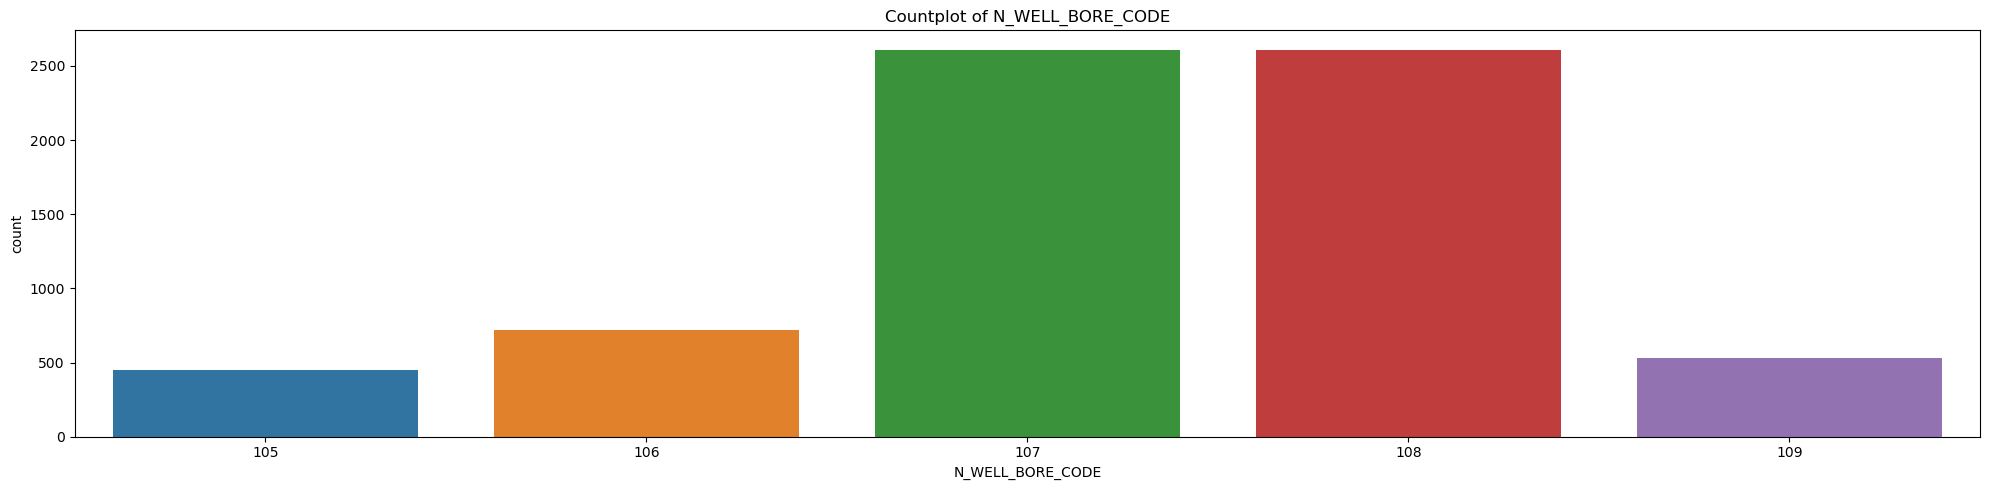

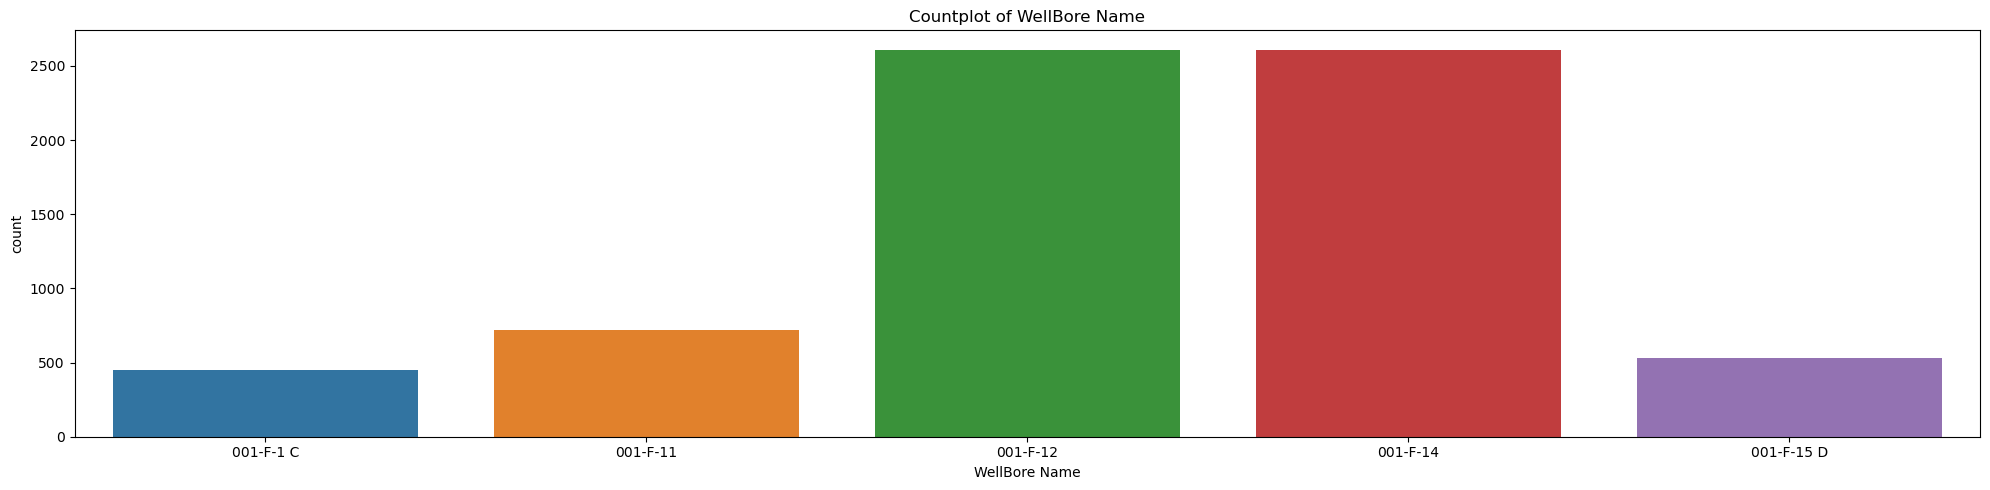

In [26]:
#### CATEGORICAL ANALYSIS

for col in ['N_WELL_BORE_CODE', 'WellBore Name']:
    plt.figure(figsize=(20, 5))
    plt.title(f'Countplot of {col}' )
    sns.countplot(x = df[col])
    plt.tight_layout()
    plt.show()

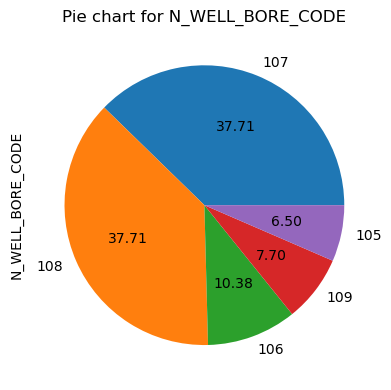

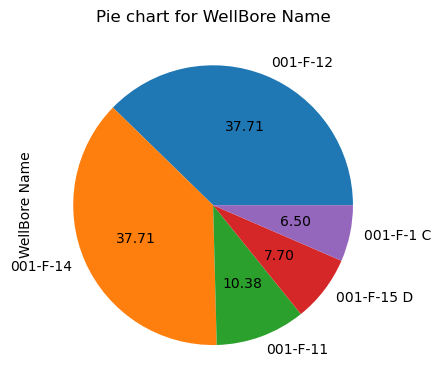

In [27]:
categorical = df.select_dtypes(include = ['object'])
for col_name in categorical.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    df[col_name].value_counts().plot(kind='pie',autopct='%.2f')
    plt.title(f'Pie chart for {col_name}')
    plt.tight_layout()
    plt.show()

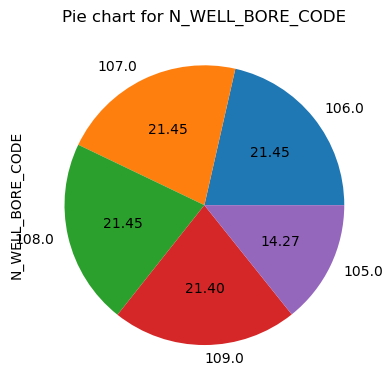

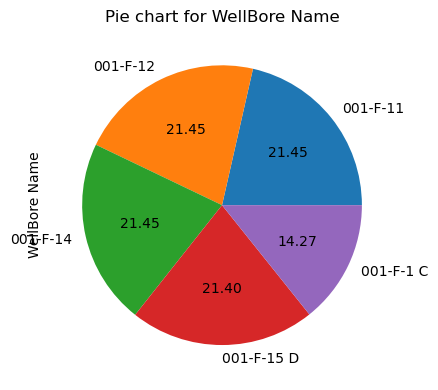

In [28]:
#VALIDATION DATASET  
categorical = test.select_dtypes(include = ['object'])
for col_name in categorical.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    test[col_name].value_counts().plot(kind='pie',autopct='%.2f')
    plt.title(f'Pie chart for {col_name}')
    plt.tight_layout()
    plt.show()

In [29]:
df[['N_WELL_BORE_CODE', 'WellBore Name']].value_counts()

N_WELL_BORE_CODE  WellBore Name
107               001-F-12         2609
108               001-F-14         2609
106               001-F-11          718
109               001-F-15 D        533
105               001-F-1 C         450
dtype: int64

#### BIVARIATE ANALYSIS

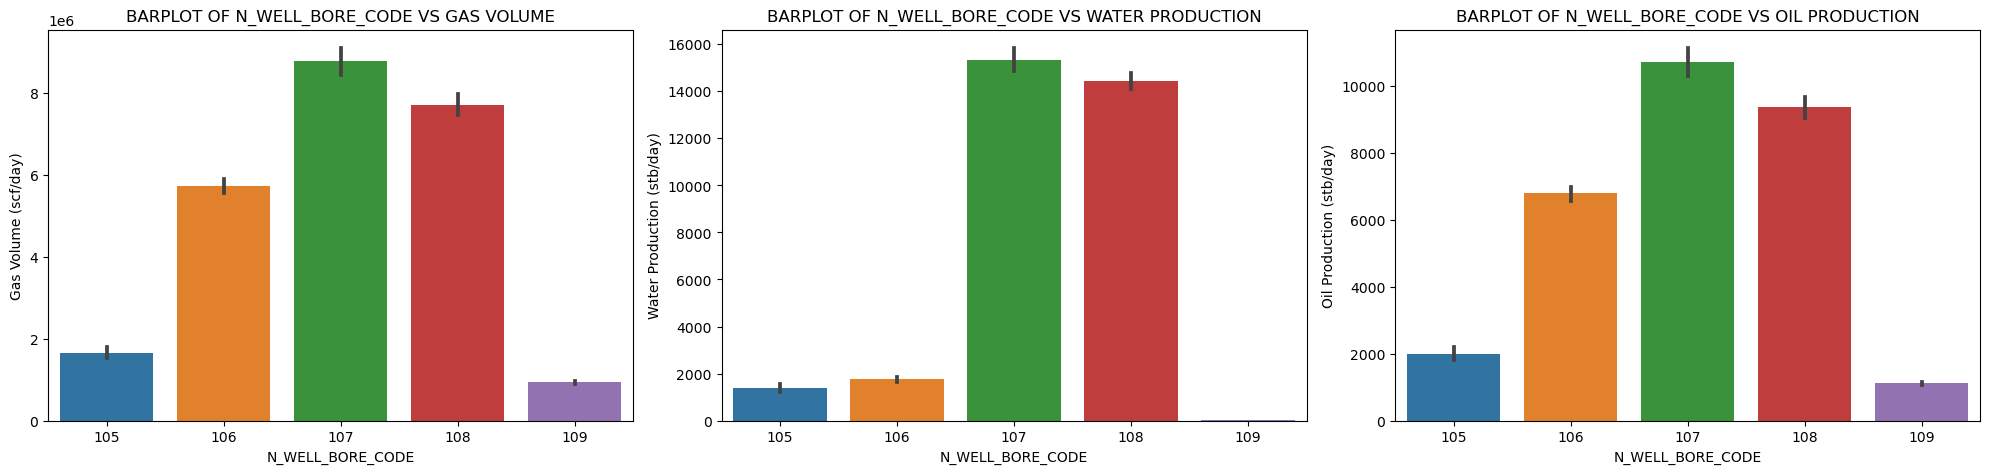

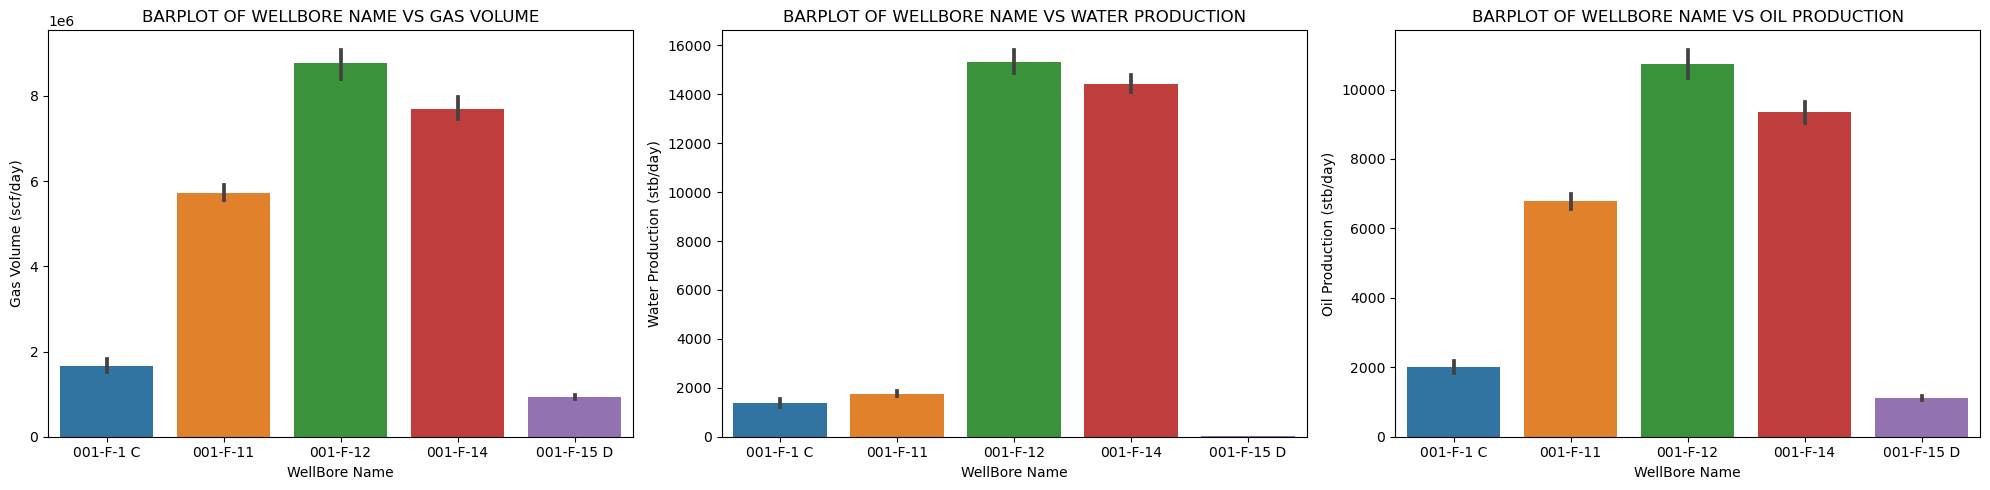

In [30]:
for col in  ['N_WELL_BORE_CODE', 'WellBore Name']:
    plt.figure(figsize=(20, 5))
    plt.subplot(131)
    plt.title(f'BARPLOT of {col} VS Gas Volume' .upper())
    sns.barplot(x = df[col], y =df['Gas Volume (scf/day)'])
    plt.subplot(132)
    plt.title(f'BARPLOT of {col} VS Water Production' .upper())
    sns.barplot(x=df[col], y = df['Water Production (stb/day)'])
    plt.subplot(133)
    plt.title(f'BARPLOT of {col} VS Oil Production' .upper())
    sns.barplot(x=df[col], y = df['Oil Production (stb/day)'])
    plt.tight_layout()
    plt.show()

FROM OUR ANALYSIS WE CAN SEE THAT  WELL_BORE_CODE AND  WELL_BORE_NAME HAVE THE SAME NUMER OF UNIUQE ELEMENTS,
ALSO FROM THE BARPLOT WE UNCORVED THAT THEY HAVE THE SIMILAR REPRESENTATION.
SINCE THEY ARE GIVEN THE SAME INFORMATION WE WILL DROP THE  WELL_BORE_CODE.

In [31]:
df = df.drop(columns= ['N_WELL_BORE_CODE'])
test = test.drop(columns= ['N_WELL_BORE_CODE'])

<Axes: title={'center': 'OIL PRODUCTION FOR ALL WELLS'}, xlabel='PRODUCTION DATE', ylabel='Oil Production (stb/day)'>

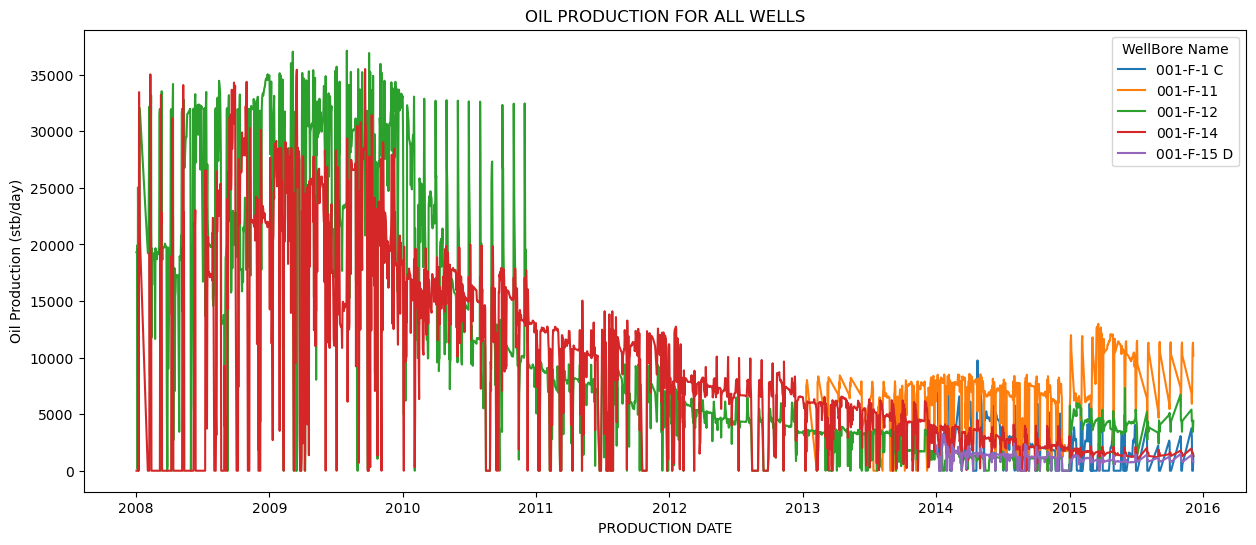

In [32]:
plt.figure(figsize=(15,6))
plt.title("Oil production for all wells".upper())
sns.lineplot( data = df ,x ="PRODUCTION DATE" , y = "Oil Production (stb/day)" ,hue ="WellBore Name",)

<Axes: title={'center': 'GAS PRODUCTION FOR ALL WELLS'}, xlabel='PRODUCTION DATE', ylabel='Gas Volume (scf/day)'>

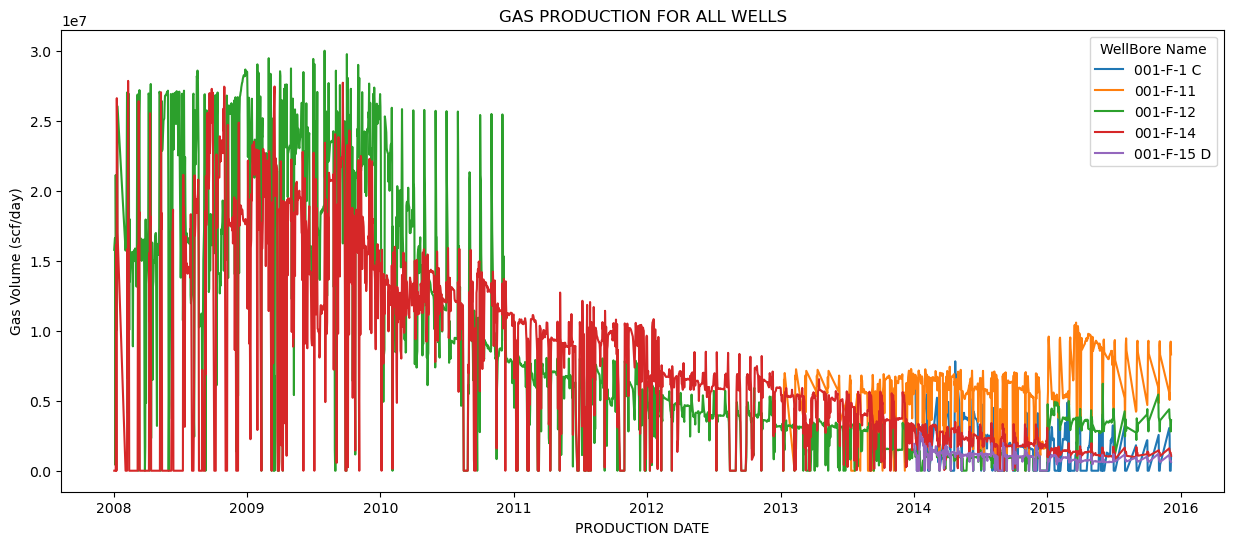

In [33]:
plt.figure(figsize=(15,6))
plt.title("Gas production for all wells".upper())
sns.lineplot( data= df ,x ="PRODUCTION DATE" , y = "Gas Volume (scf/day)" ,hue ="WellBore Name",)

<Axes: title={'center': 'WATER PRODUCTION FOR ALL WELLS'}, xlabel='PRODUCTION DATE', ylabel='Water Production (stb/day)'>

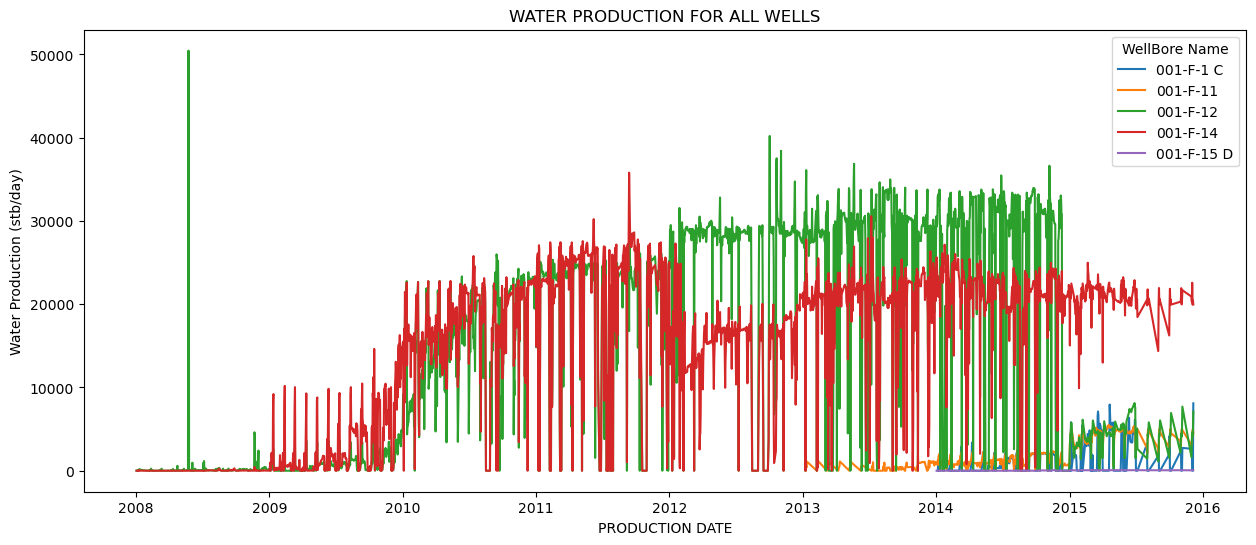

In [34]:
plt.figure(figsize=(15,6))
plt.title("Water production for all wells".upper())
sns.lineplot( data= df ,x ="PRODUCTION DATE" , y ="Water Production (stb/day)" ,hue ="WellBore Name",)

KEY TAKEWAYS:
THE OIL AND GAS PRODUCTION DECREASE WITH TIME WHILE
WATER PRODUCTION INCREASES WITH  TIME

In [35]:
# contribution of each well in the production 
well_prod_oil = df.groupby("WellBore Name")["Oil Production (stb/day)"].mean()  
well_prod_oil

WellBore Name
001-F-1 C      2007.602503
001-F-11       6790.970905
001-F-12      10726.273256
001-F-14       9357.949622
001-F-15 D     1118.861778
Name: Oil Production (stb/day), dtype: float64

In [36]:
# contribution of each well in the production 
well_prod_GAS = df.groupby("WellBore Name")["Gas Volume (scf/day)"].mean()  
well_prod_GAS

WellBore Name
001-F-1 C     1.661200e+06
001-F-11      5.728230e+06
001-F-12      8.759950e+06
001-F-14      7.694371e+06
001-F-15 D    9.371485e+05
Name: Gas Volume (scf/day), dtype: float64

In [37]:
# contribution of each well in the production 
well_prod_water = df.groupby("WellBore Name")["Water Production (stb/day)"].mean()  
well_prod_water

WellBore Name
001-F-1 C      1390.235089
001-F-11       1763.827696
001-F-12      15318.827891
001-F-14      14424.831300
001-F-15 D       24.352095
Name: Water Production (stb/day), dtype: float64

### Numerical variables analysis

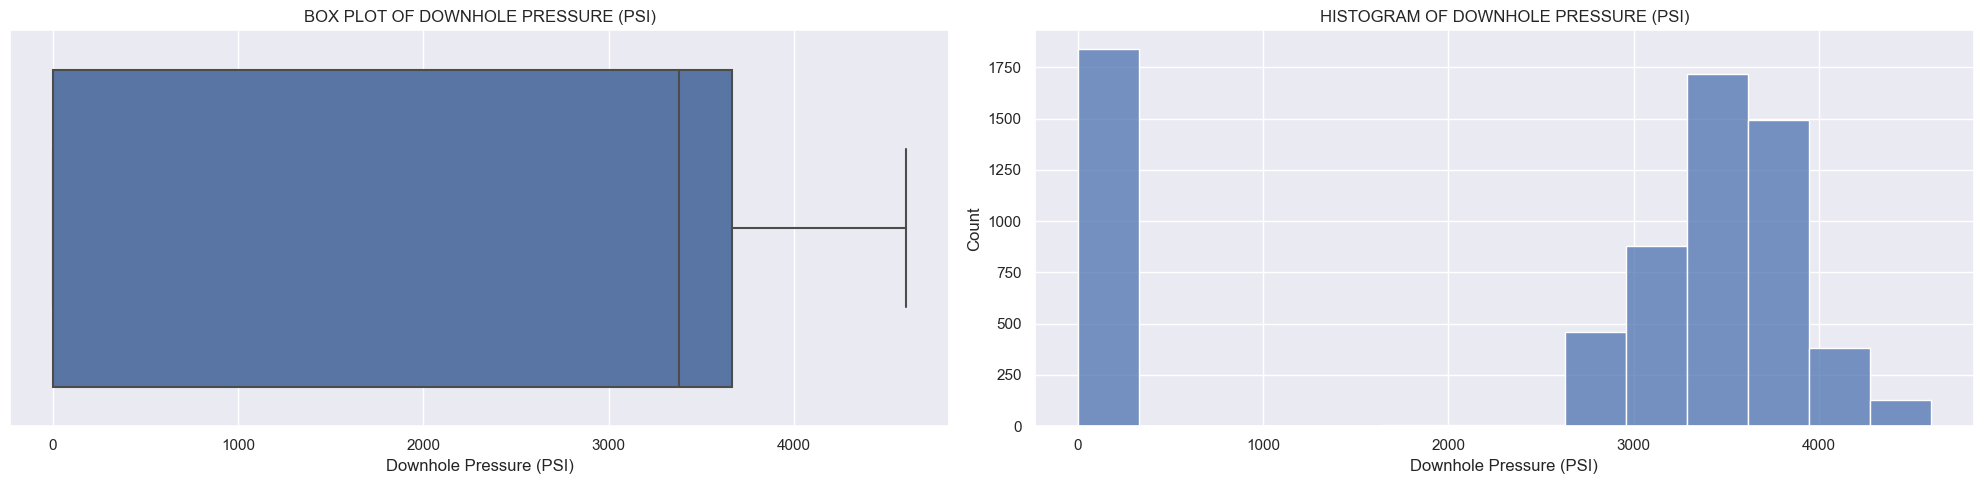

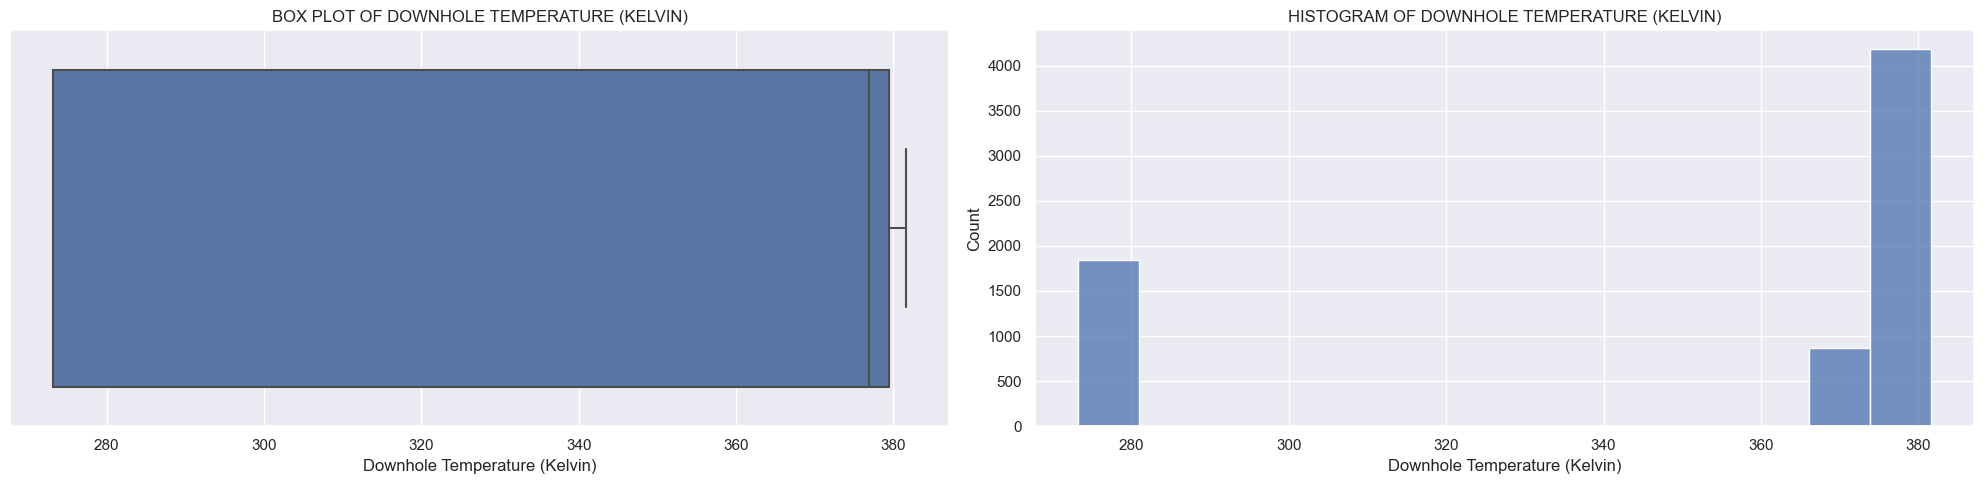

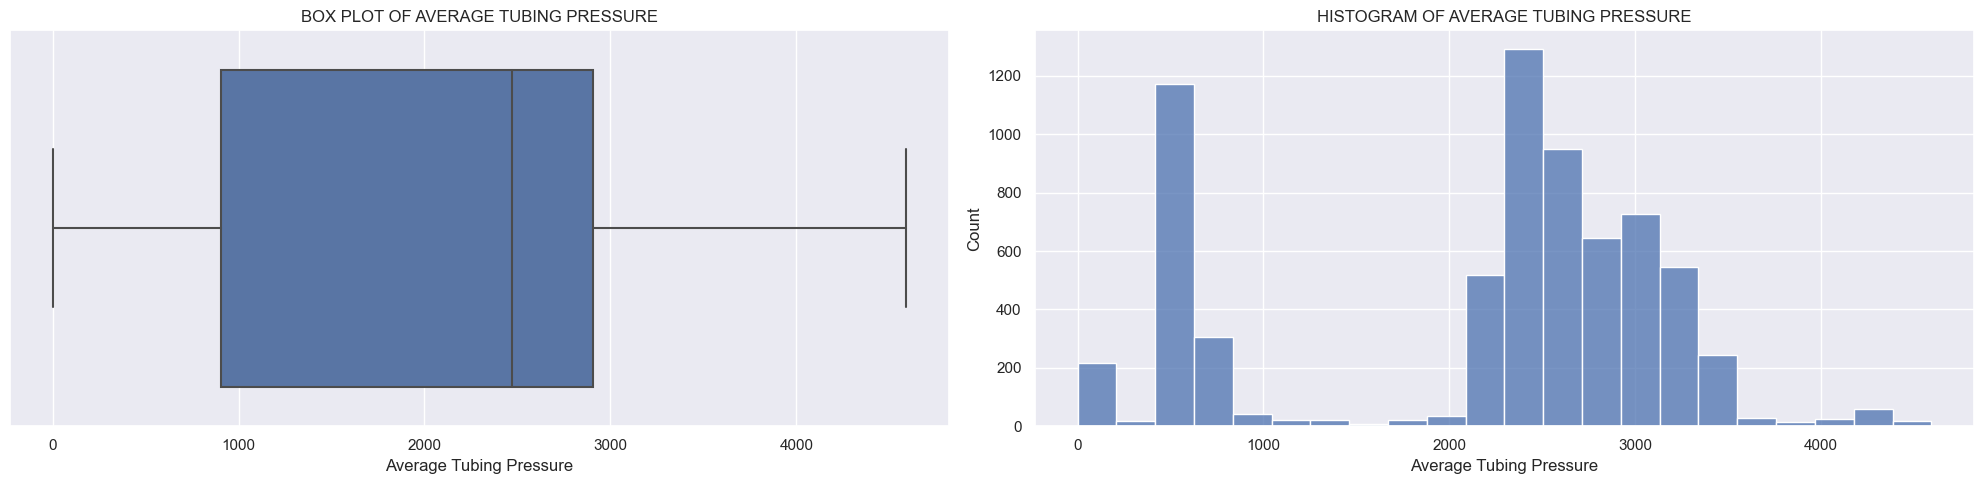

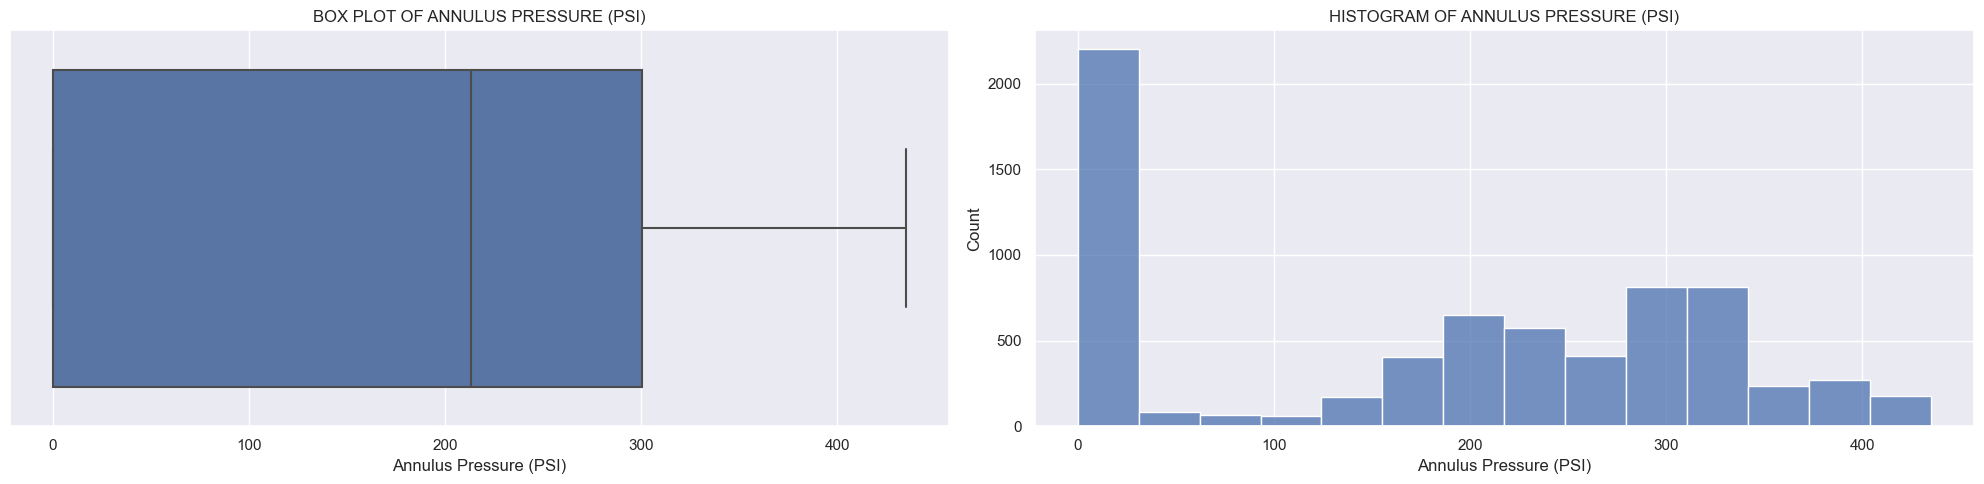

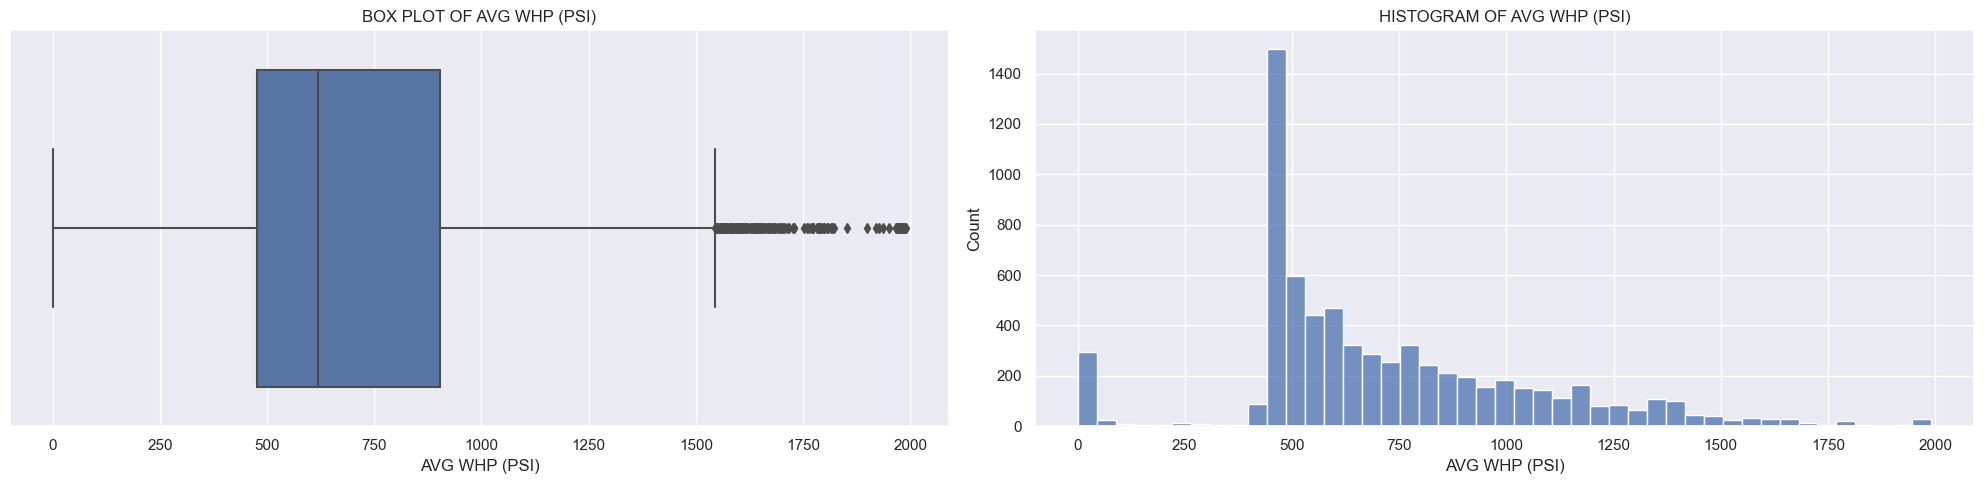

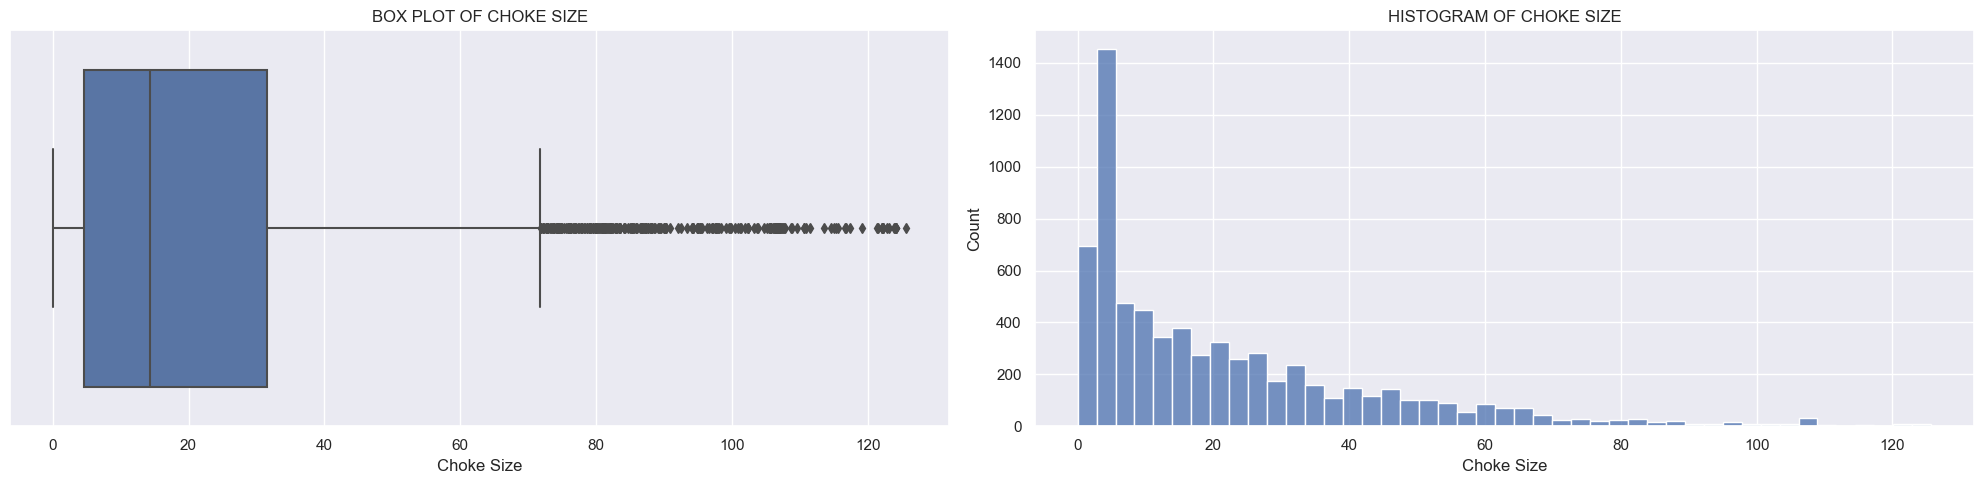

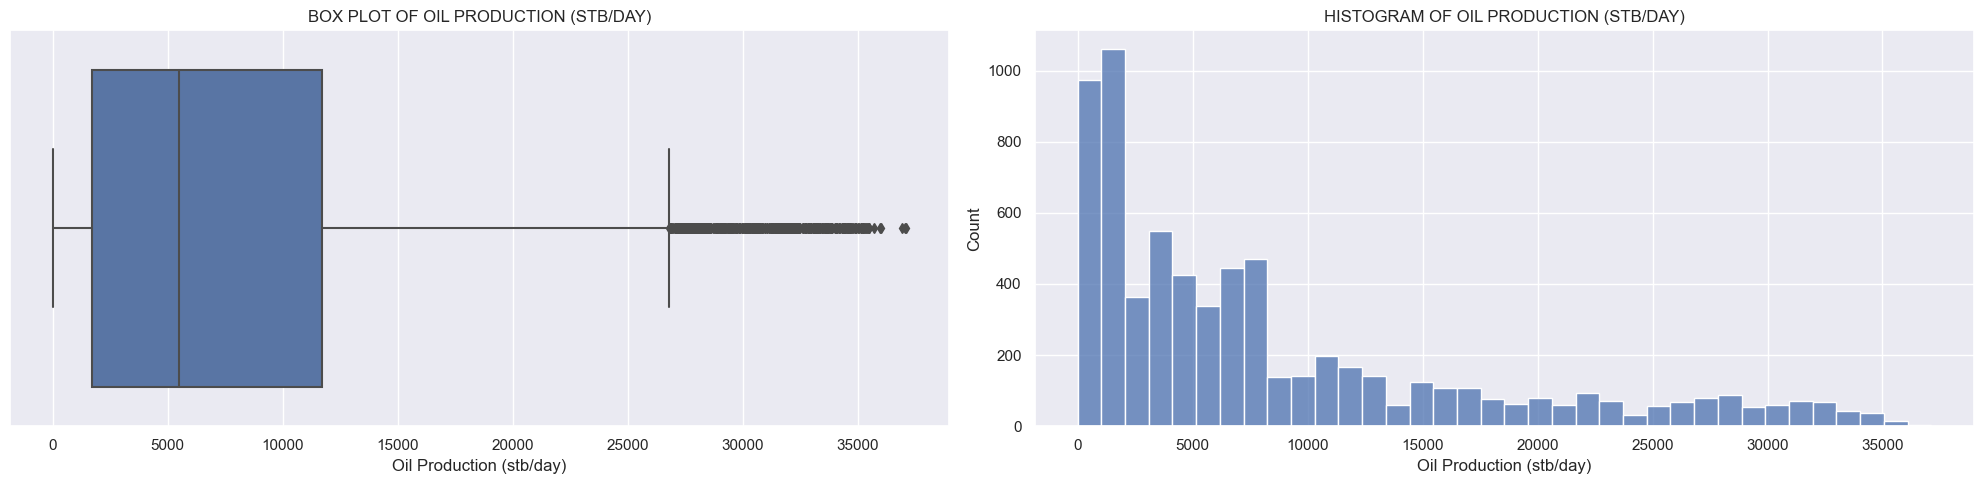

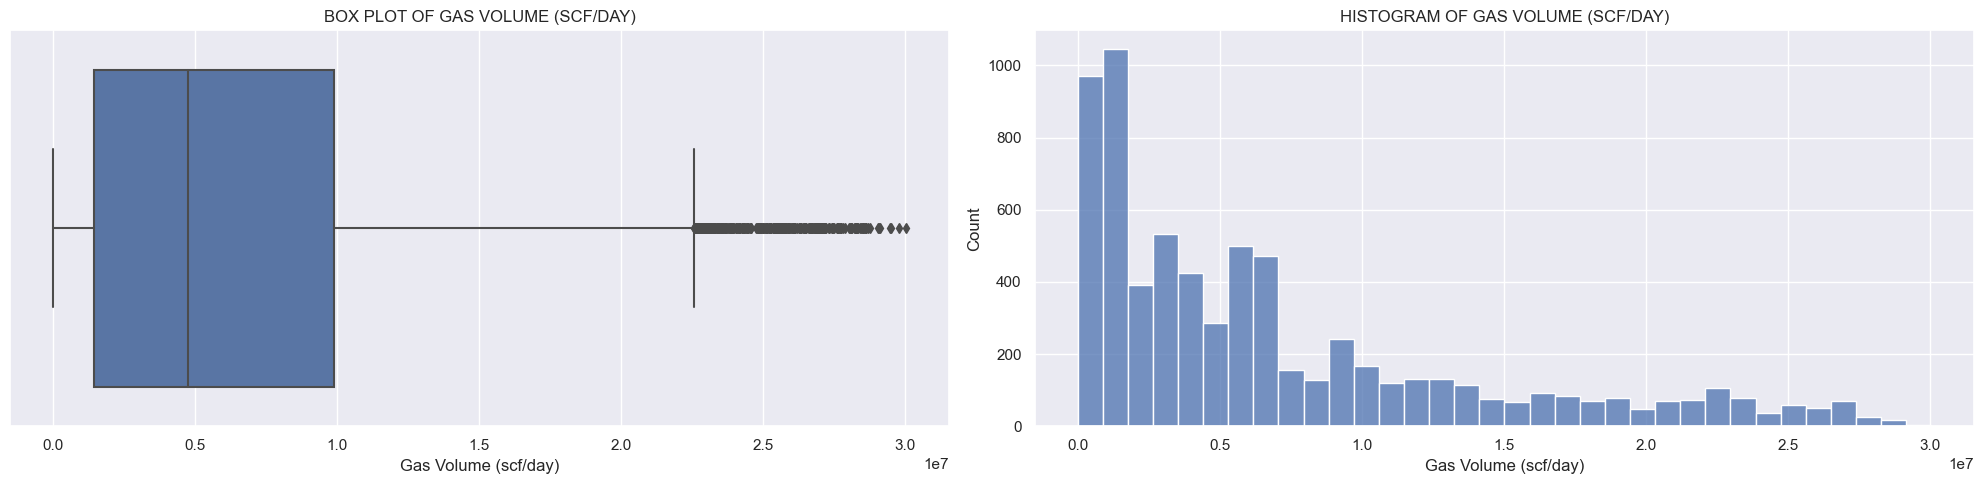

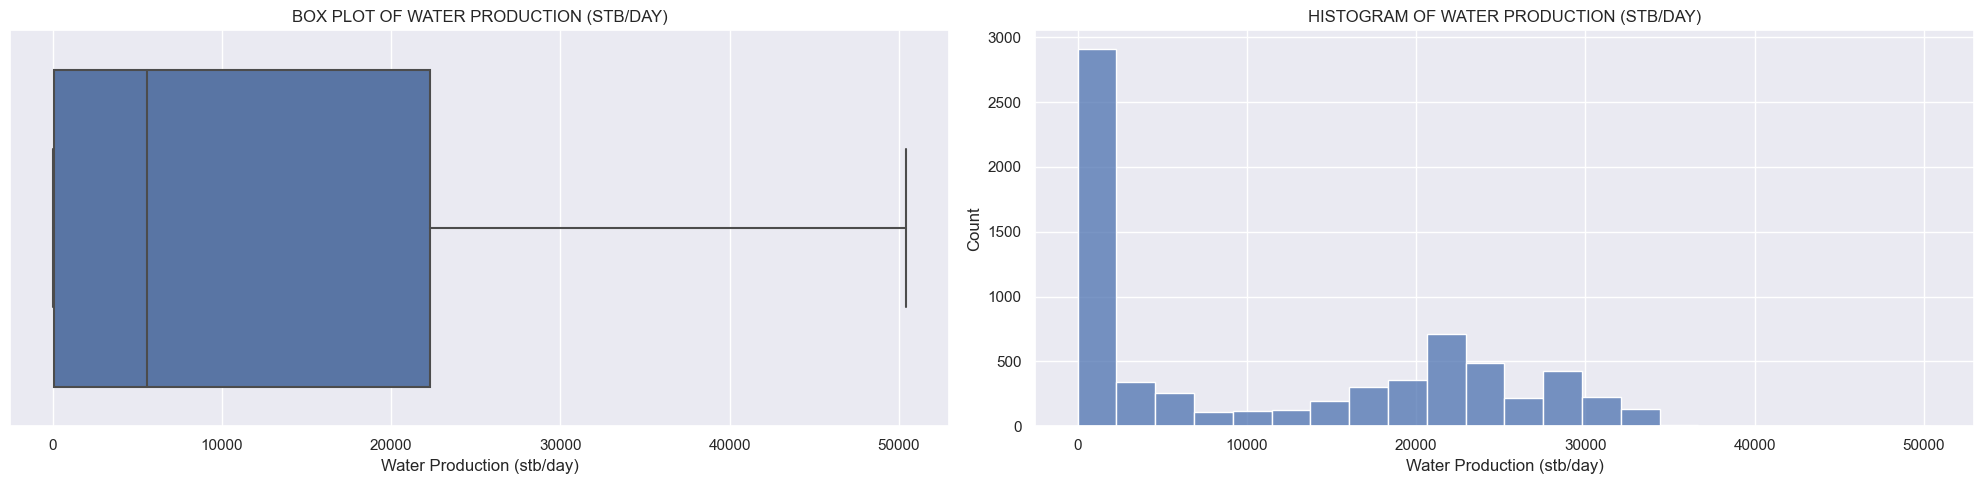

In [38]:
#BOXPLOT AND HISTOGRAM PLOT TO DETECT THE PRESENCE OF OUTLIERS AND CHECK THE DISTIRBUTION OF EACH COLUMN

for col in num_feats:
    sns.set()
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    plt.title(f"BOX PLOT OF {col}".upper())
    sns.boxplot(x = df[col]) 
    
    plt.subplot(122)
    plt.title(f"HISTOGRAM OF {col}".upper())
    sns.histplot(x =  df[col]) 
    plt.tight_layout()
    plt.show()

### DISTRIBUTION PLOT OF NUMERICAL COLUMNS

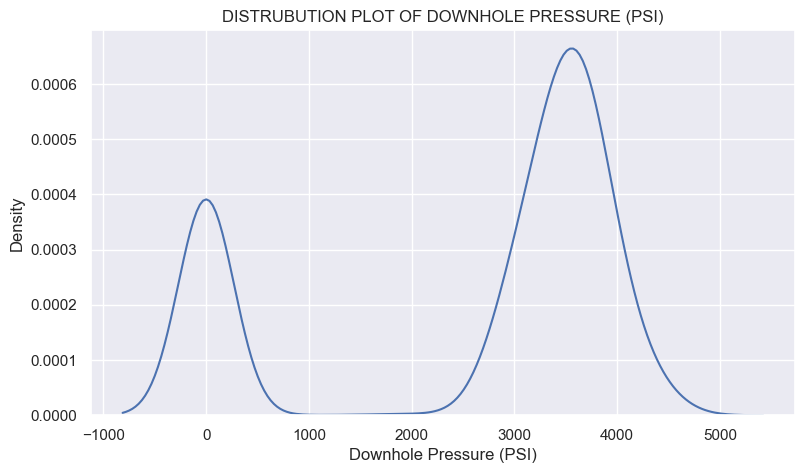

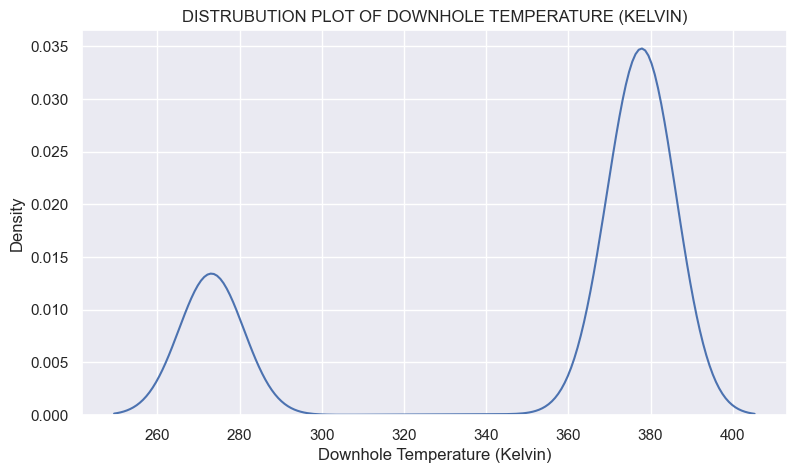

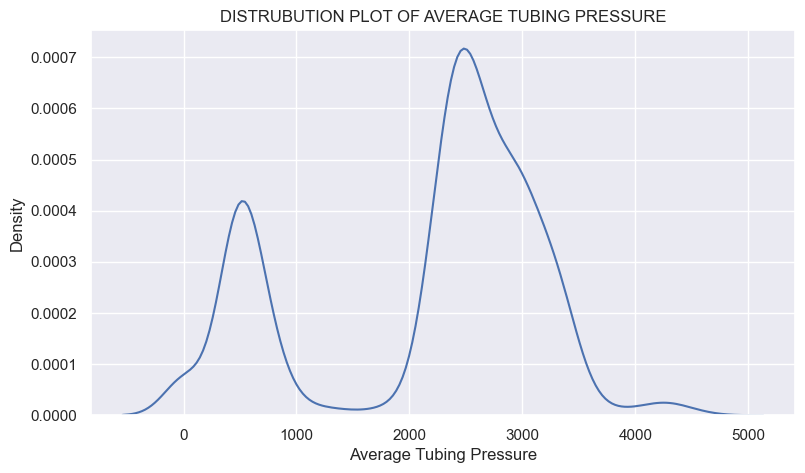

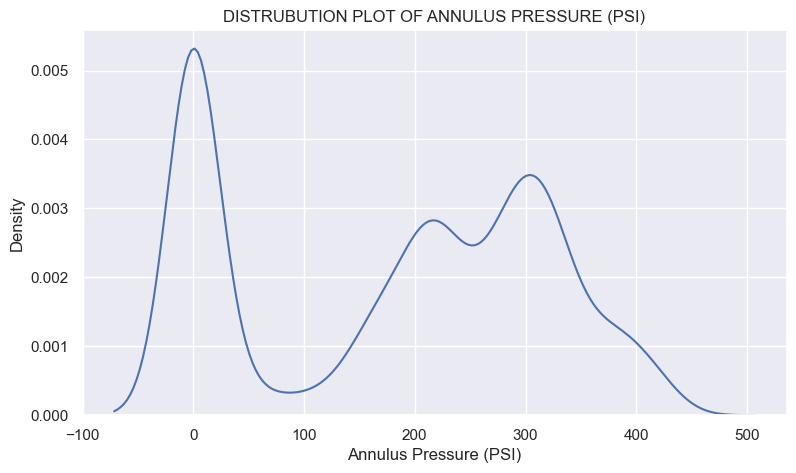

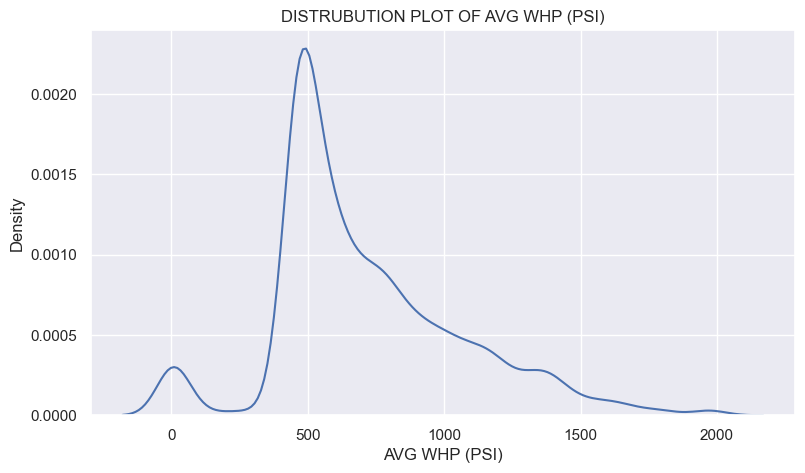

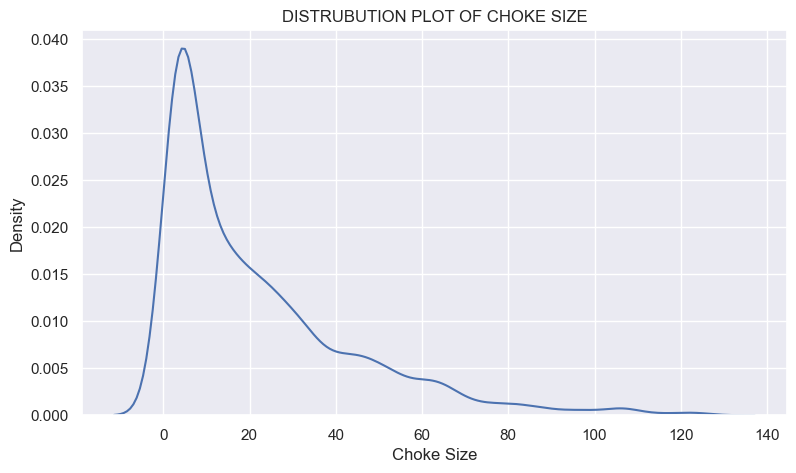

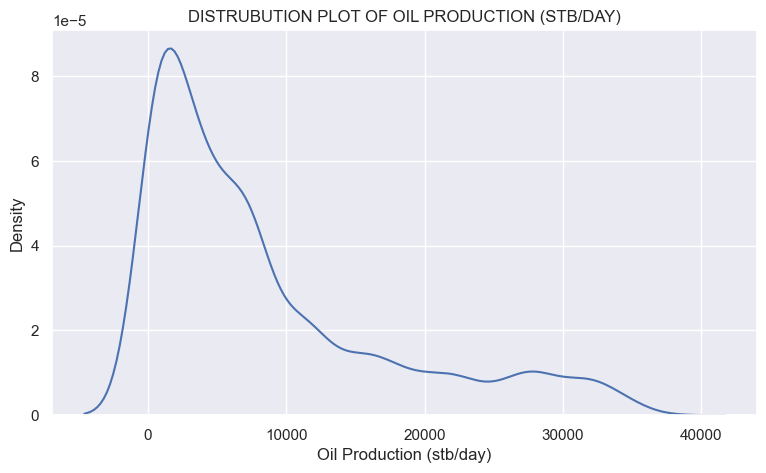

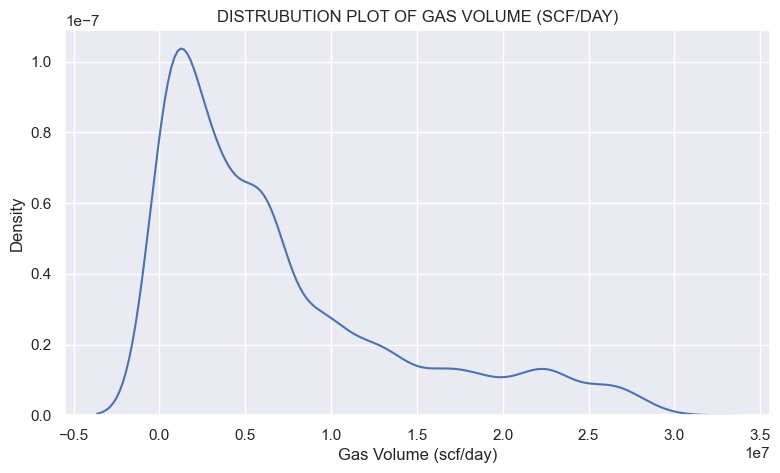

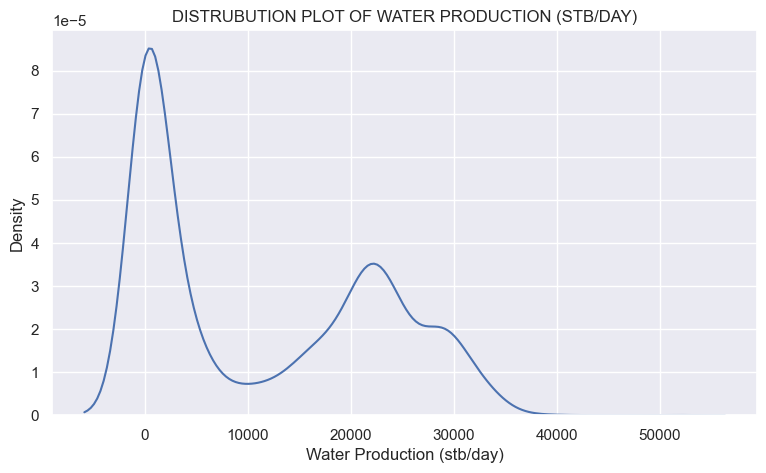

In [39]:
#DISTRIBUTION PLOT 
for col in num_feats:
    sns.set()
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    plt.title(f"DISTRUBUTION PLOT OF {col}".upper())
    sns.kdeplot(x = df[col])

KEY TAKEAWAYS:
FROM THE ABOVE PLOTS WE CAN SEE THAT SOME OF OUR COLUMNS CONTAIN OUTLIERS AND ARE NOT NORMALLY DISTRIBUTED

In [40]:
# HIGHLY SKEWED COLUMN IN THE TRAINING DATASET
skew_list = [ ]
skew_col = [ ]
for col in num_feats:
    skew_value = df[col].skew()
    if skew_value > 0.7:
        skew_list.append(skew_value)
        skew_col.append(col) 
        
skew_result =pd.DataFrame({'Skewness_Value': skew_list}, index = skew_col)
skew_result.sort_values(by = 'Skewness_Value')   

Skewness_Value
AVG WHP (PSI)                   0.731791
Gas Volume (scf/day)            1.270425
Oil Production (stb/day)        1.322820
Choke Size                      1.604033

In [41]:
#SKEWNESS IN THE TEST VALIDATION DARASET
skew_list = [ ]
skew_col = [ ]

num_feats_test = test.select_dtypes(include = [ np.number]).columns
cat_feats_test = test.select_dtypes(exclude = [np.number]).columns

for col in num_feats_test:
    skew_value = test[col].skew()
    if skew_value > 0.7:
        skew_list.append(skew_value)
        skew_col.append(col) 
        
skew_result_test = pd.DataFrame({'Skewness_Value': skew_list}, index = skew_col)
skew_result_test 

Skewness_Value
AVG WHP (PSI)        2.069942
Choke Size           2.779675

FROM THESE TABLES WE CAN SEE THAT 'AVG WHP (PSI)','Choke Size',                                                               'Oil Production (stb/day)','Gas Volume (scf/day)'ARE HIGHLY SKEWED COLUMNS.

### BIVARIATE ANALYSIS

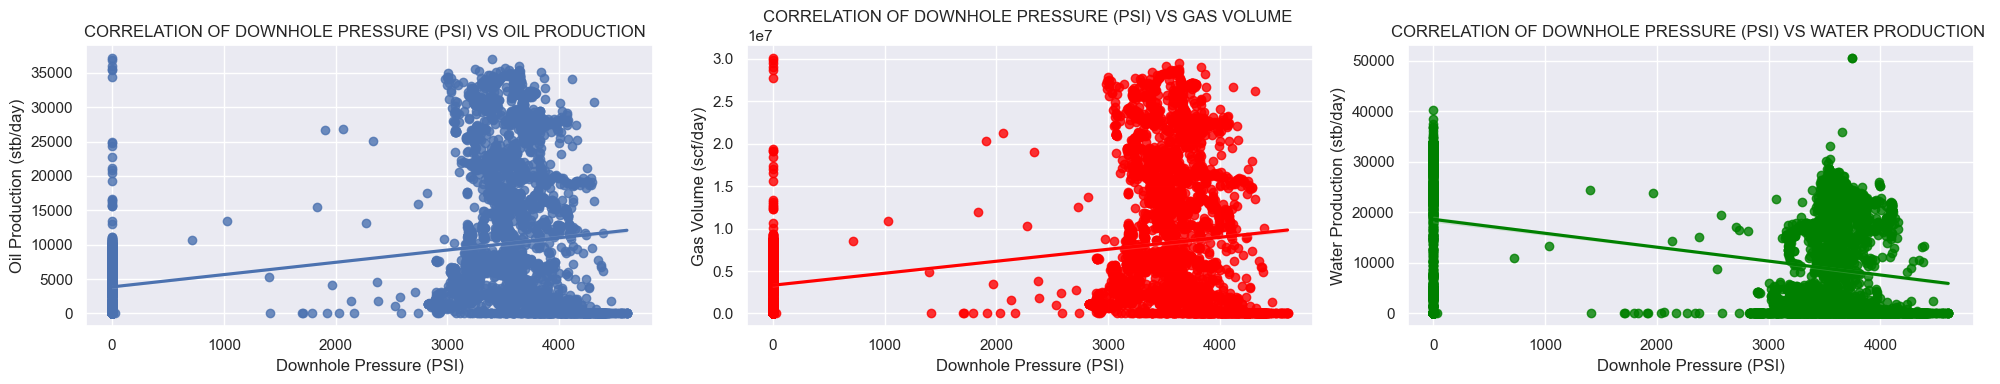

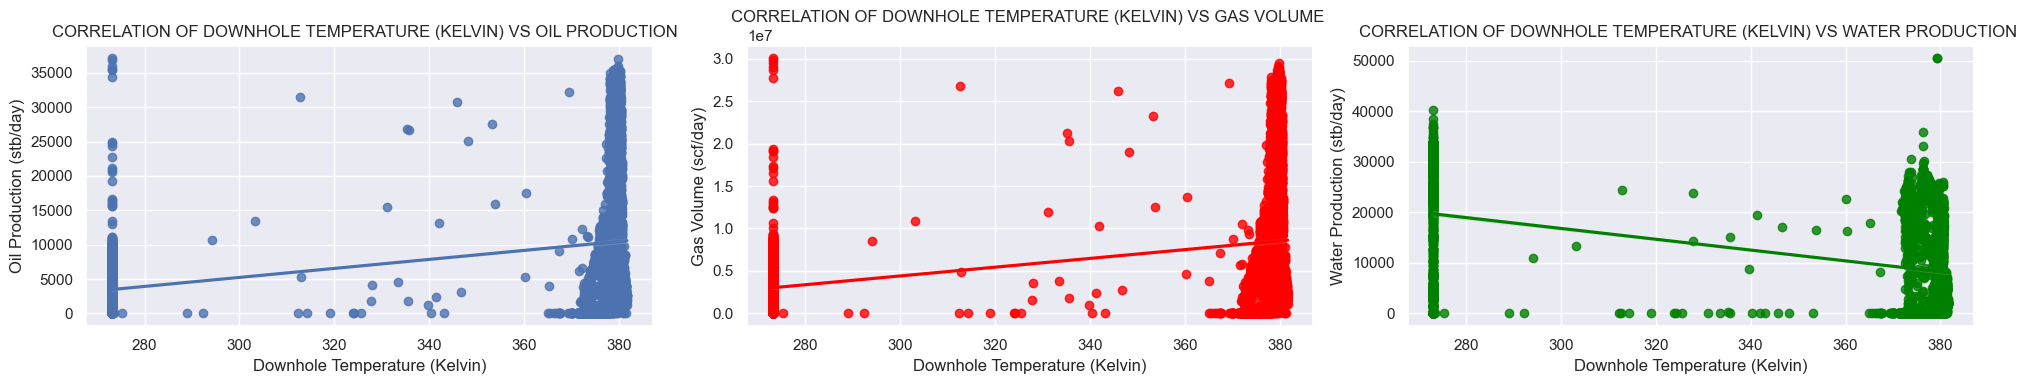

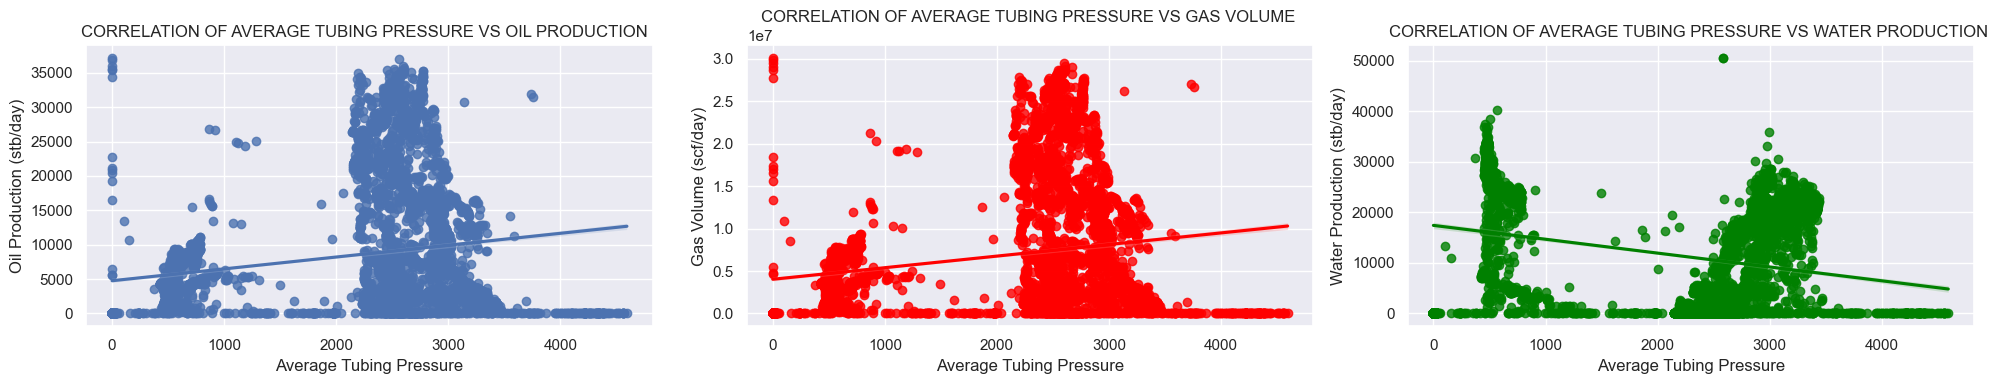

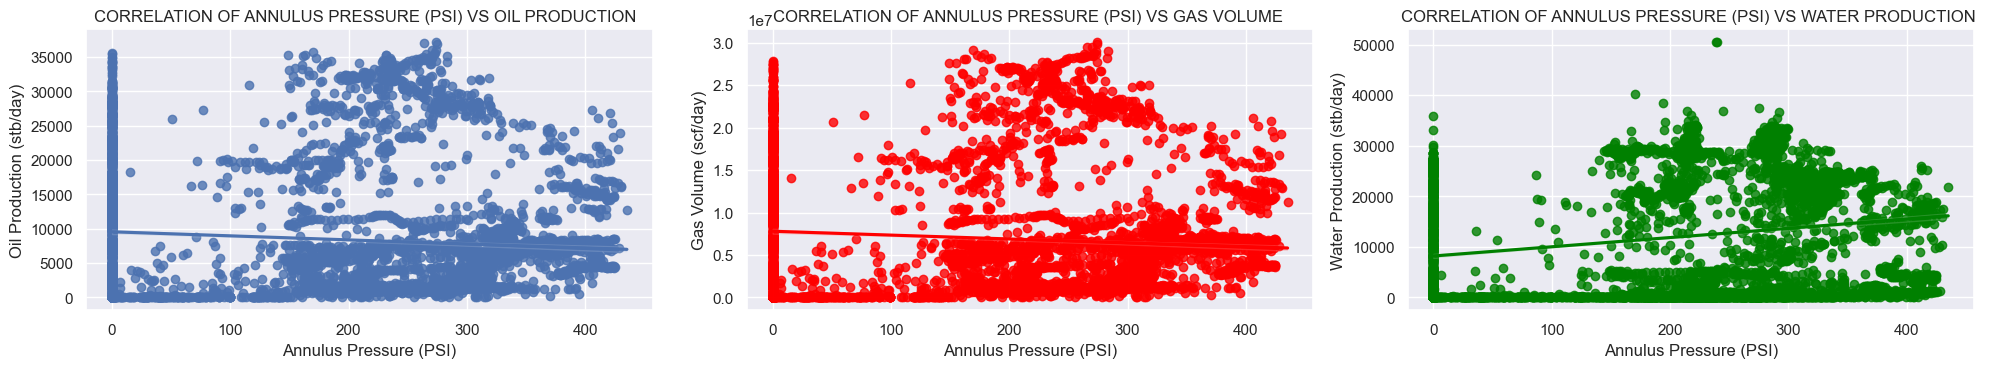

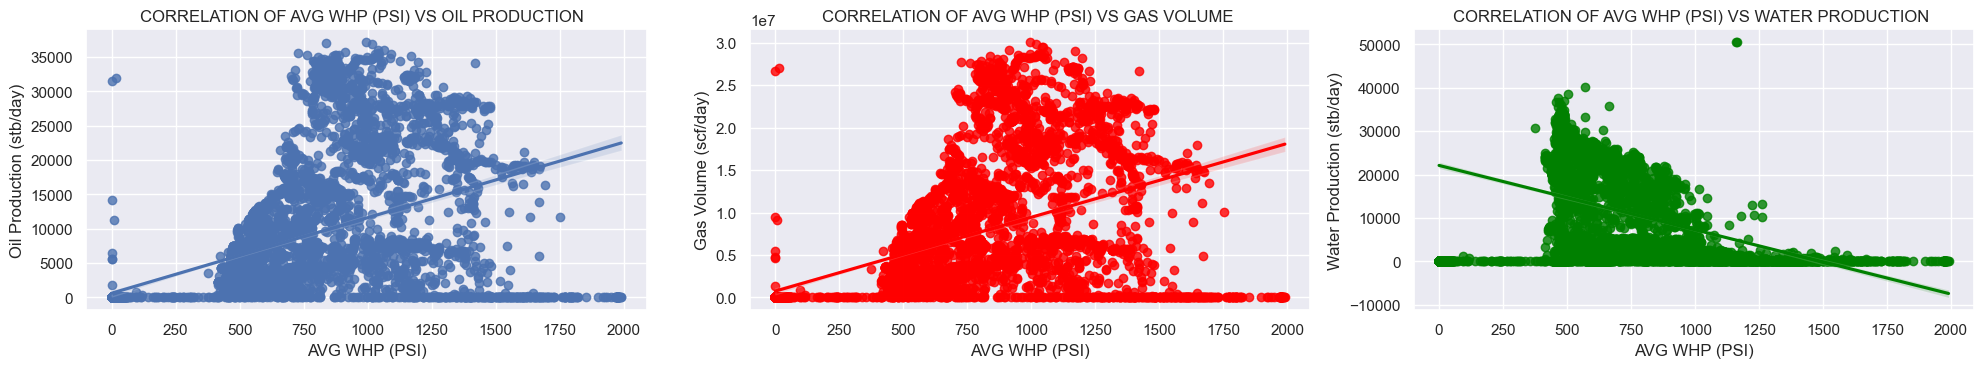

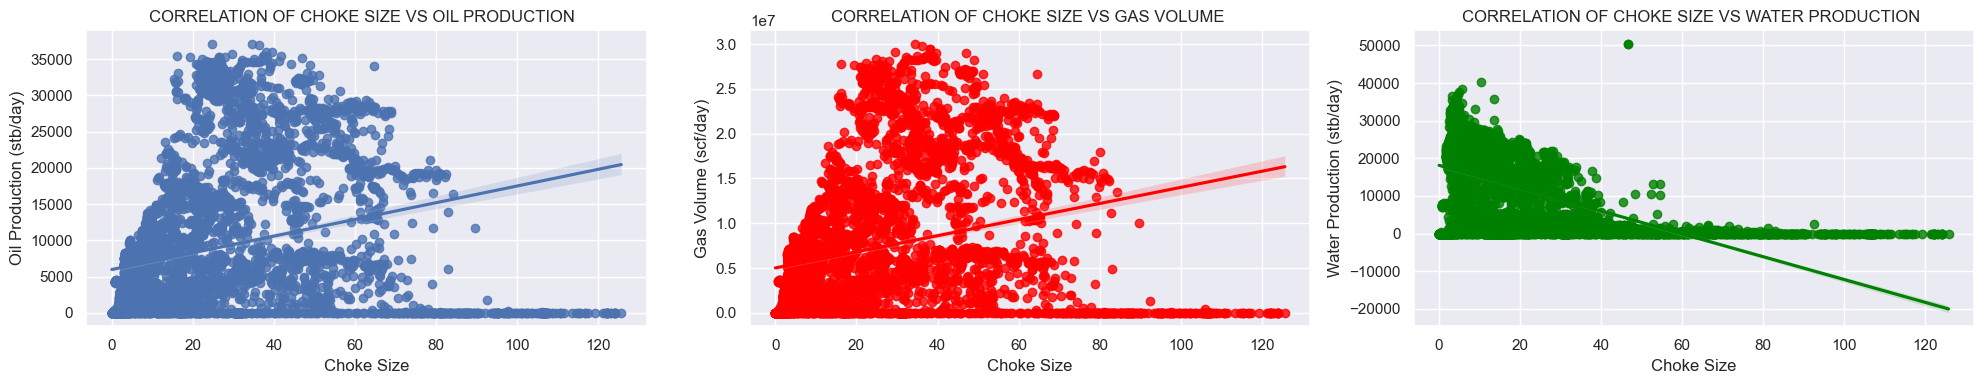

In [42]:
## REGRESION PLOT
target = ['Oil Production (stb/day)', 'Gas Volume (scf/day)' ,'Water Production (stb/day)']

for col in num_feats:
    if col  in target :
        continue
    sns.set()
    plt.figure(figsize=(20,4))
    plt.subplot(131)
    plt.title(f"CORRELATION OF {col} Vs Oil Production  ".upper())
    sns.regplot(x = df[col], y =df ['Oil Production (stb/day)']) 
    
    plt.subplot(132)
    plt.title(f"CORRELATION OF {col} Vs Gas Volume ".upper())
    sns.regplot(x = df[col], y =df ['Gas Volume (scf/day)'], color='red')
    
    plt.subplot(133)
    plt.title(f"CORRELATION OF {col} Vs Water Production ".upper())
    sns.regplot(x = df[col], y =df ['Water Production (stb/day)'], color='green')
    plt.tight_layout()
    plt.show()

### Correlation Matrix

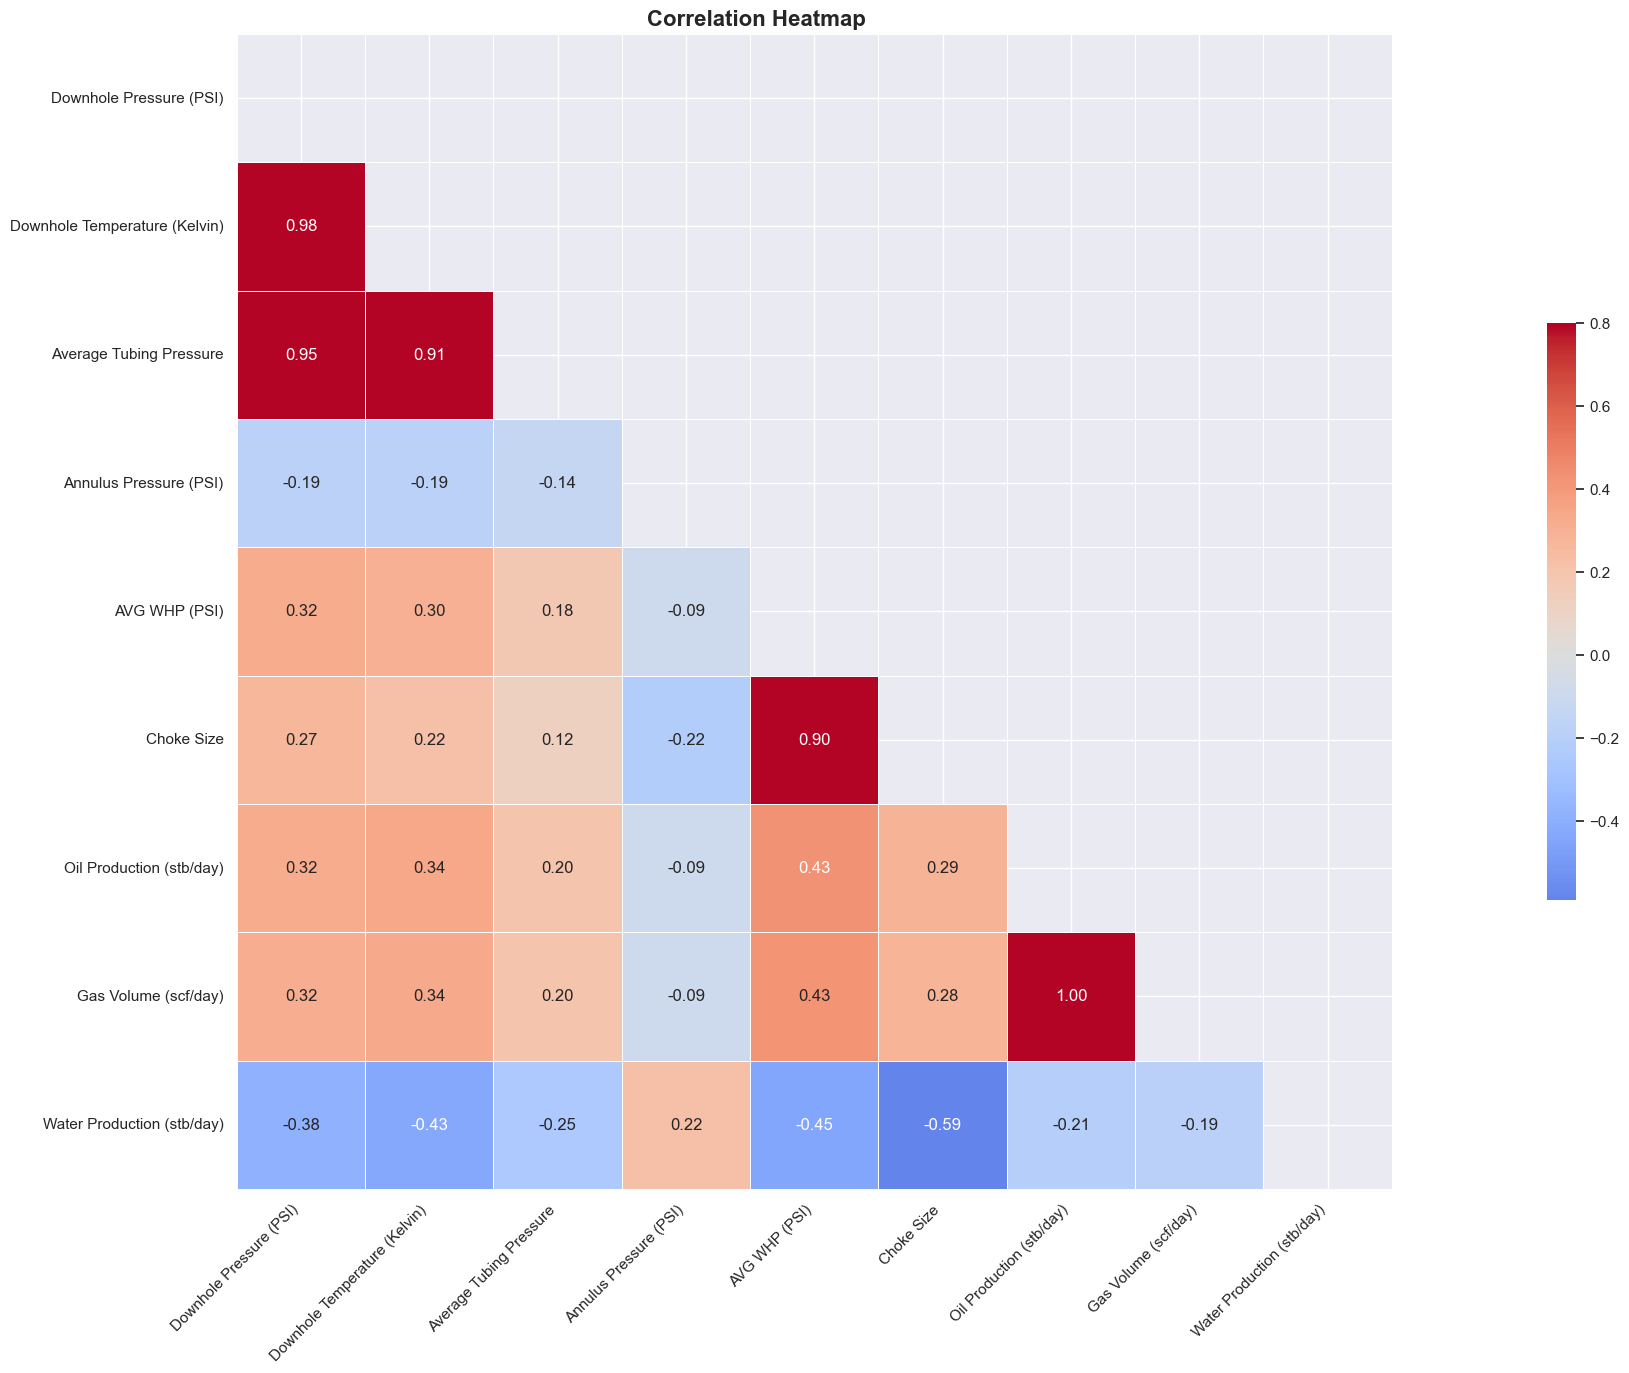

In [43]:
#CORRELATION BETWEEN THE INDEPENDENTS FEATURES AND THE TARGETS COLUMNS
#HEATMAP PLOT 

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(40, 15))

heatmap = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.8, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

title = heatmap.set_title("Correlation Heatmap", weight='bold', size=16)
title.set_position([0.45, 1.1])
plt.show()

FROM  HEATMAP PLOT, THE CORRELATION BETWEEN THE INDEPENDENT VARIABLES AND THE TARGET VARIABLES IS WEAK.
THIS SUGGESTS THAT OUR MACHINE LEARNING MODEL MAY NOT FOLLOW A LINEAR REGRESSION MODEL.
THE CHOKE SIZE AND 'AVG WHP (PSI) SHOW A POSITIVE CORELLATION WITH 'Oil Production (stb/day)' and'Gas Volume (scf/day)' WHILE 
THEY SHOW A NEGATIVE CORELLATION WITH 'Water Production (stb/day)'
ALSO THERE IS STRONG CORRELATION BETWEEN INDEPENDENT VARIABLE WHICH MAY NOT FAVOUR A LINEAR REGRESSION MODEL.

<div id="3" style="background-color: #89B9AD88; padding: 12px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 32px;">
    Feature Engineering
    </h1>
</div>

### FEATURES TRANSFORMATION

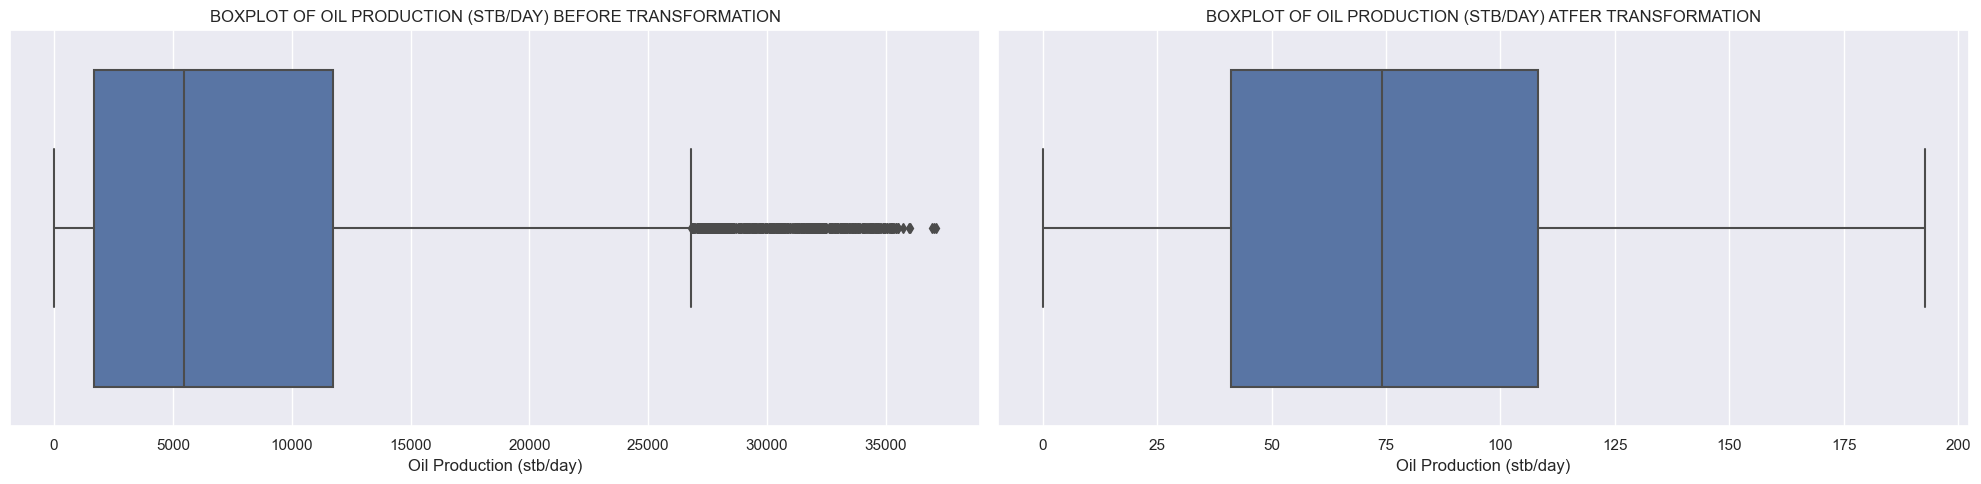

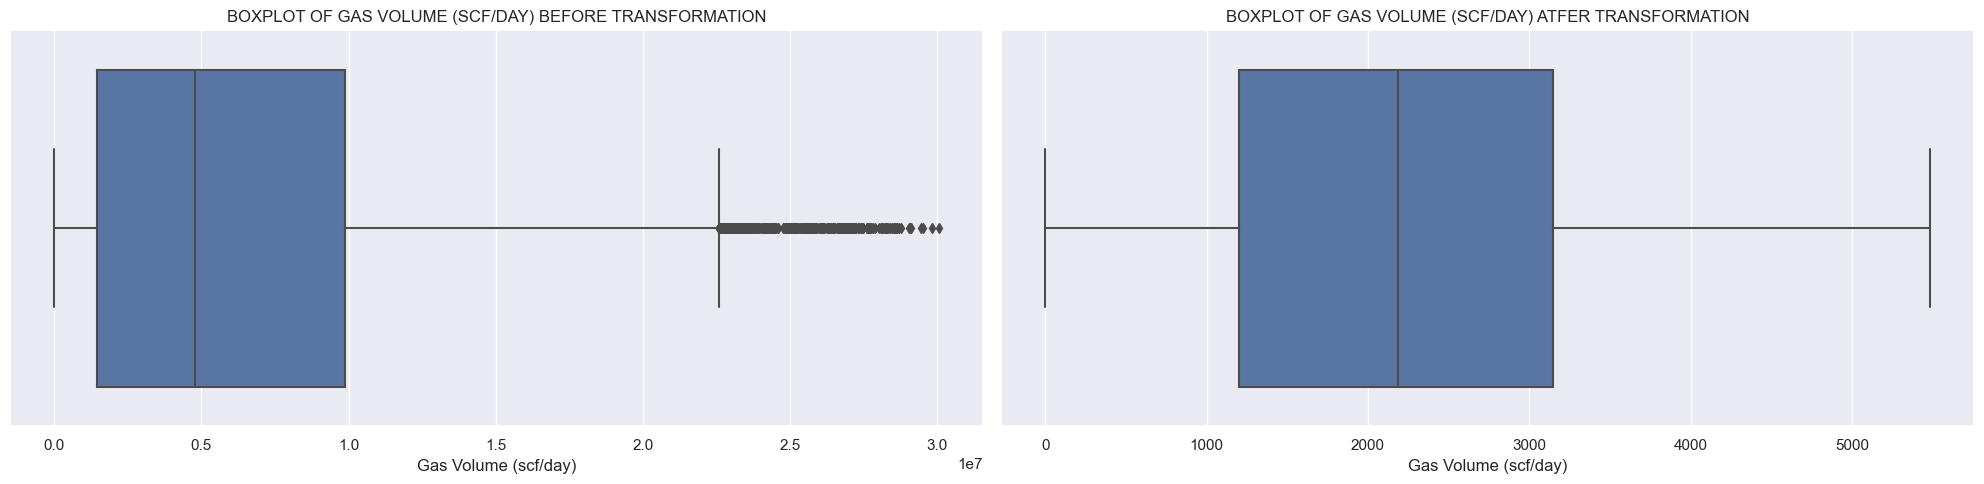

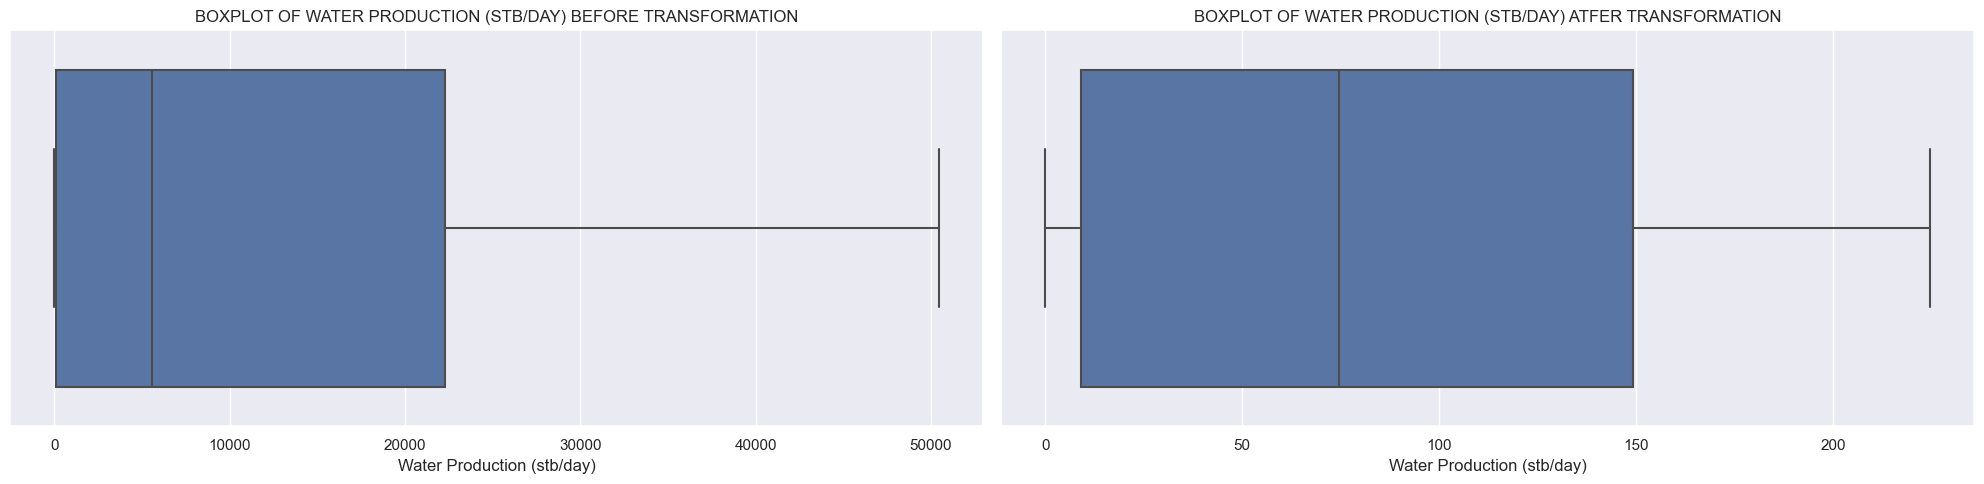

In [47]:
# In order to address the outliers initially seen, we will take the square root of the target columns
target = ['Oil Production (stb/day)', 'Gas Volume (scf/day)' ,'Water Production (stb/day)']
for col in target:
    plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.title(f'BOXPLOT of {col} BEFORE TRANSFORMATION'.upper())
    sns.boxplot(x = (df[col]) )
    plt.subplot(122)
    plt.title(f'Boxplot of {col} ATFER TRANSFORMATION'.upper())
    sns.boxplot(x = np.power (df[col], 1/2))
    plt.tight_layout()
    plt.show()

<Axes: title={'center': ' BOXPLOT OF CHOKE SIZE AFTER TRANSFORMATION'}, xlabel='Choke Size'>

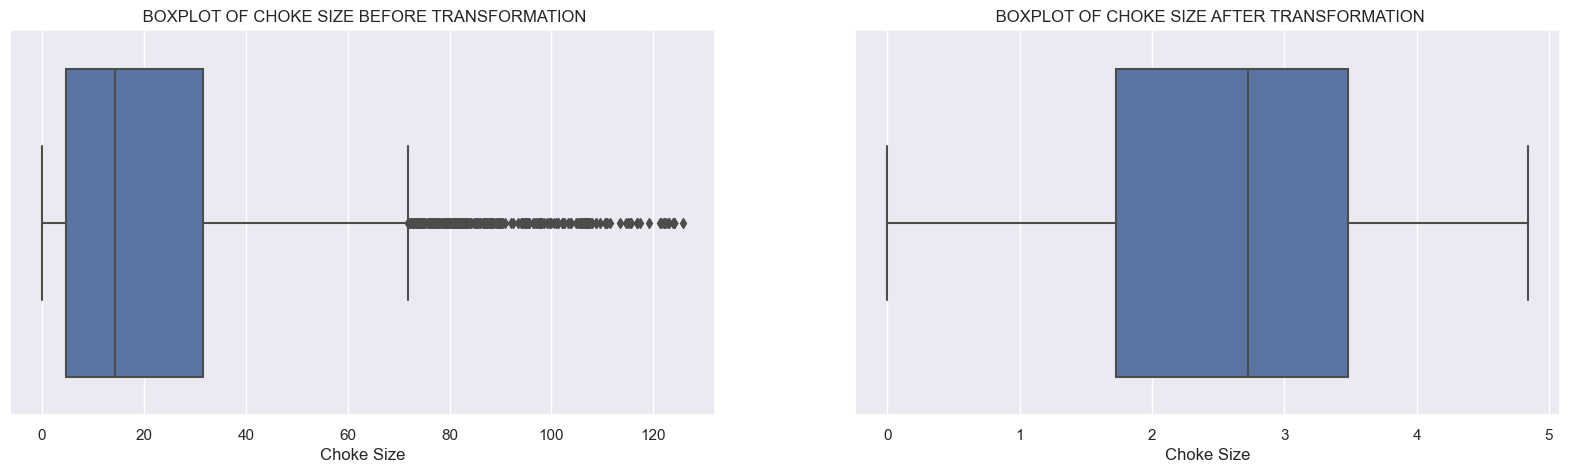

In [48]:
#LOG TRANSFORMATION WORK BETTER FOR THE CHOKE SIZE
plt.figure(figsize=(20, 5))
plt.subplot(121) 
plt.title(f' BOXPLOT OF Choke Size BEFORE TRANSFORMATION'.upper() )
sns.boxplot(x = df['Choke Size'] )
plt.subplot(122)
plt.title(f' BOXPLOT OF Choke Size AFTER TRANSFORMATION'.upper() )
sns.boxplot(x = np.log1p (df['Choke Size'] ) )

#### DATE TIME FEATURE ENGINEERING

In [49]:
import datetime as dt

def date_feature_eng (data):
    data['PRODUCTION DATE'] = pd.to_datetime (data['PRODUCTION DATE'] )
    data['Year_of_Production'] = data['PRODUCTION DATE'].dt.year
    data['Month_of_Production'] = data['PRODUCTION DATE'].dt.month
    data["total_days"] = (data["PRODUCTION DATE"] - data["PRODUCTION DATE"].min()).dt.days
    data = data.drop(columns = ['PRODUCTION DATE'])
    return data

df = date_feature_eng(df)
test = date_feature_eng(test)

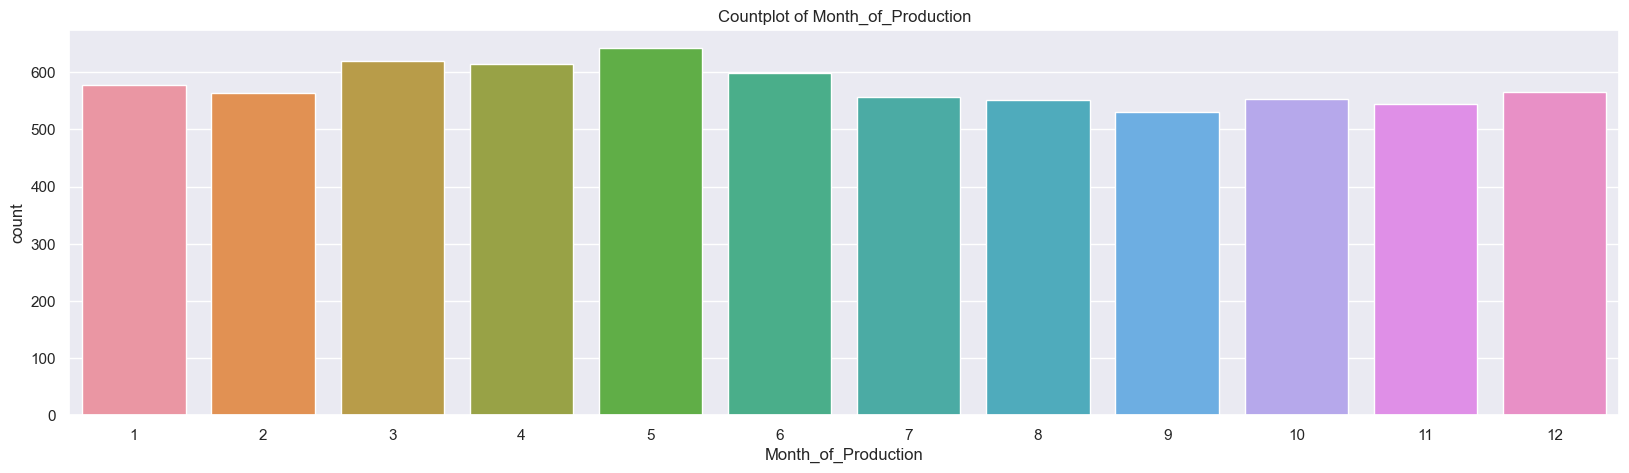

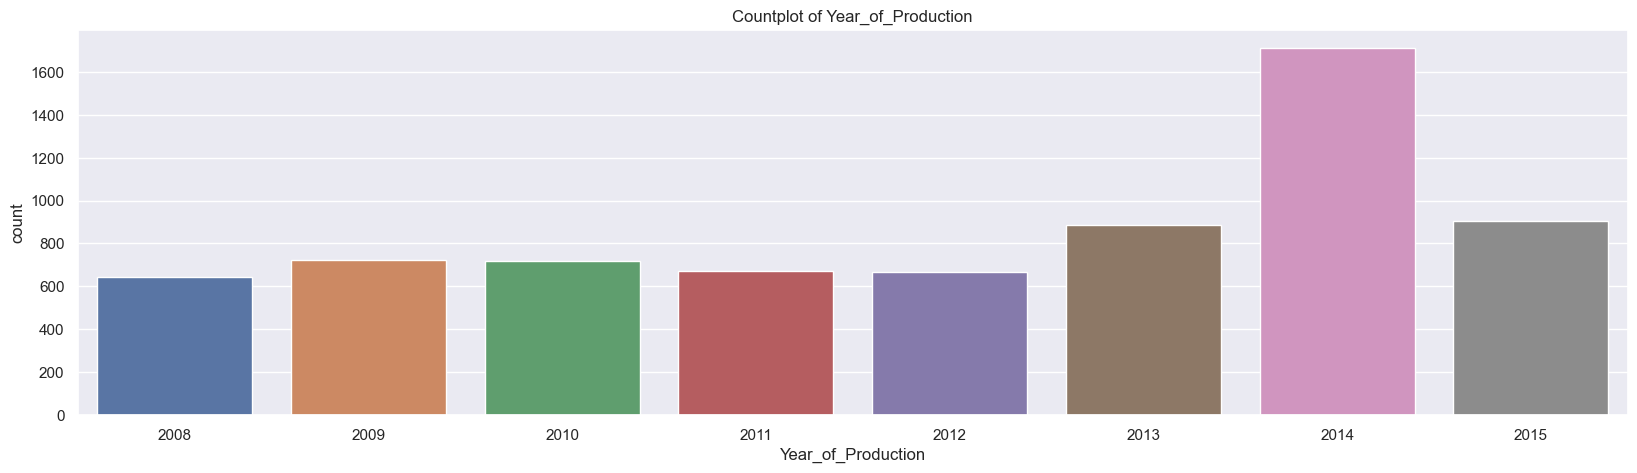

In [50]:
for col in ['Month_of_Production' ,'Year_of_Production']:
    plt.figure(figsize=(20, 5))
    plt.title(f'Countplot of {col}' )
    sns.countplot(x = df[col])
    plt.show()

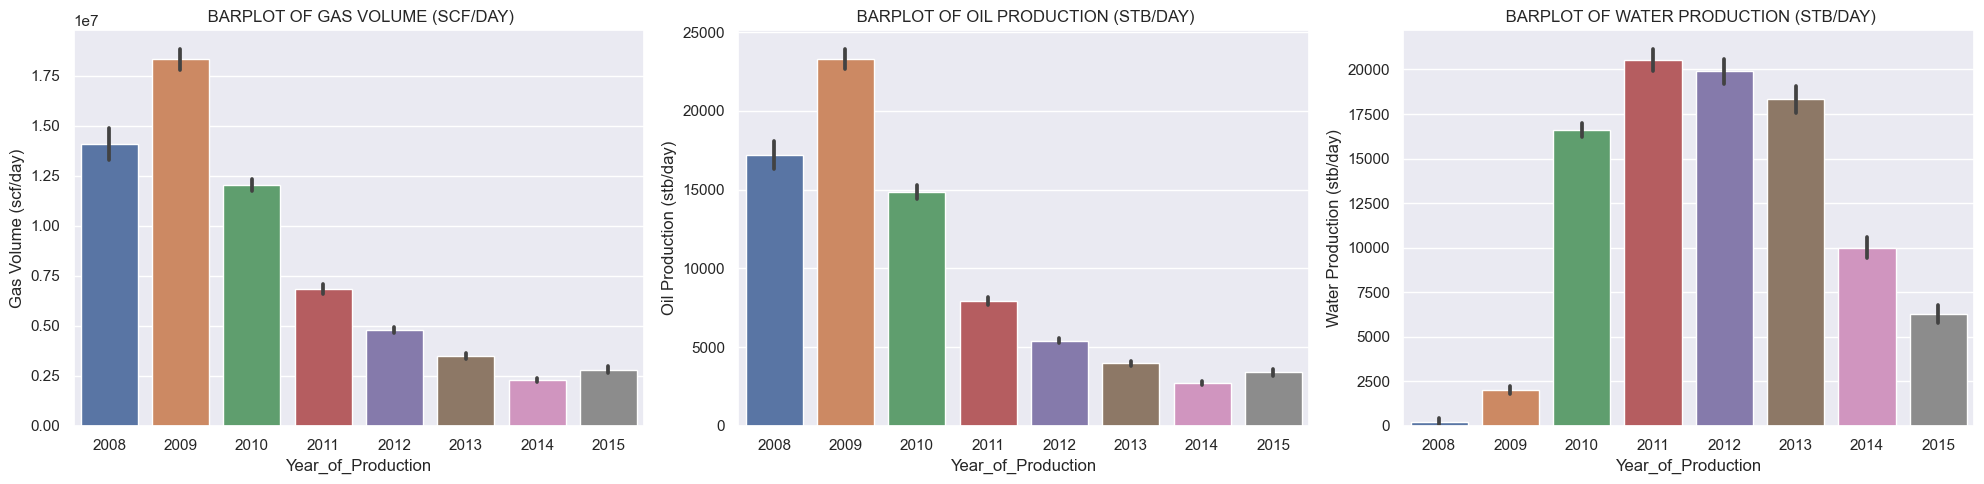

In [51]:
#YEAR OF PRODUCTION PLOT
plt.figure(figsize=figure_size)
plt.subplot(131)
plt.title(f' BARPLOT OF Gas Volume (scf/day)'.upper() )
sns.barplot (x = df['Year_of_Production'], y =df['Gas Volume (scf/day)'] )

plt.subplot(132)
plt.title(f' BARPLOT OF Oil Production (stb/day)'.upper() )
sns.barplot(x = df['Year_of_Production'], y=df['Oil Production (stb/day)'])

plt.subplot(133)
plt.title(f' BARPLOT OF Water Production (stb/day)'.upper() )
sns.barplot(x = df['Year_of_Production'], y =df['Water Production (stb/day)'])

plt.tight_layout()
plt.show()

KEY TAKEAWAYS:
OIL AND GAS PRODUCTION DECEASES OVER YEARS. THEY FOLLOW THE SAME TREND OVER YEARS
WATER PRODUCTION INCREASES FROM 2008 TO 2011 AND DRECREASES SLIGHTLY
WE CAN CONCLUDE THAT OIL AND GAS PRODUCTIONS ARE INVERSELY PROPORTIONAL TO THE WATER PRODUCTION.
 
    

#### Implementation of Fetaures Transformation  and  Categorical Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
def choke_size_and_AVG_tranformation (data):
    data['Choke Size'] = np.log1p (data['Choke Size'])
    data['AVG WHP (PSI)'] = np.sqrt (data['AVG WHP (PSI)'])
    ##below here we use get_dumies to convert wellbore name into numerical columns
    data = pd.get_dummies(data, drop_first= True) 
    return data

df = choke_size_and_AVG_tranformation(df)
test = choke_size_and_AVG_tranformation(test)

### FEATURES SCALING

In [53]:
from sklearn.preprocessing import MinMaxScaler

target = ['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']
def scale_feature (data):
    scaler = MinMaxScaler()
    num_feats = ds.structdata.get_num_feats(df)
    for col in num_feats:
        if col in target: # this condition will helps us to skip our target features during feature scaling
            continue
        data[col] = scaler.fit_transform(data[[col]])
    return data

df = scale_feature (df)
test = scale_feature (test)


<div id="3" style="background-color: #89B9AD88; padding: 12px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 32px;">
       Models Training
    </h1>
</div>

### MODEL TRAINING  AND EVALUATION

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor
from catboost import Pool, CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split

In [55]:
#list of models

model_dict = {
    'Linear' : LinearRegression(),
    'Extra_tree': ExtraTreesRegressor(n_estimators=1000 , random_state= 2000),
    'Random_forest' : RandomForestRegressor(n_estimators= 1000, random_state= 2000),
    'Gradient_boost': GradientBoostingRegressor(),
    'Hist_boost': HistGradientBoostingRegressor(random_state = 2024),
    'Catboost': CatBoostRegressor(random_state = 2024, verbose=False ),
    'Xgboost': XGBRegressor(random_state= 2024),
    'Lgbm': LGBMRegressor(random_state = 2024, verbosity = 0)
}

In [56]:
## Let us seperate our targets from the independent variables
target = ['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']

X = df.drop(columns = target )
y = df[target]

In [57]:
#CHECKING THE SHAPE OF INDEPENDET VARAIBLES (X), VALIDATION DATASET (test) AND OUR TARGETS (y)
X.shape, test.shape, y.shape

((6919, 13), (2075, 13), (6919, 3))

In [58]:
#SPLITING THE TRAINING DATASET INTO TRAIN TEST WITH 80% FOR TRAINING THE MODELS

def data_spliting (data):
    X_train, X_test, y_train, y_test = train_test_split(X,  y , test_size = 0.2, random_state = 2024)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test =  data_spliting(df)

In [59]:
##TRAIN TEST SPLIT FOR MODELS TRAINING AND SELECTION 

model_list = [ ]
r2_score_list = [ ]

def best_selection ( model_dict):
    for model_name, model in model_dict.items():
        r2_temp = []
        
        #Model Building
        multi_model= MultiOutputRegressor((model)) #the mulioutput will helps us to predict the (3) targets at once. 
        multi_model.fit (X_train, np.power (y_train, 0.5 )) #the square root of the target is taken to ensure no bias due to outliers initially seen.
        y_pred =  np.power ( multi_model.predict(X_test), 2 )  # the square of the predicted value is taken to reverse the effect of the square root. 
            
        ###Model Evaluation
        r2 = r2_score( y_test, y_pred )
        r2_temp.append(r2)
    
            
        model_list.append(model_name)
        r2_score_list.append(np.average(r2_temp))
      
    return (pd.DataFrame({'Model': model_list, 'r2_score': r2_score_list}))

In [60]:
# Print the result of each model
k_fold_result = best_selection(model_dict)
k_fold_result.sort_values(by='r2_score', ascending = False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


Model  r2_score
1      Extra_tree  0.966654
2   Random_forest  0.965718
5        Catboost  0.962327
6         Xgboost  0.959790
7            Lgbm  0.959618
4      Hist_boost  0.959305
3  Gradient_boost  0.929879
0          Linear  0.739855

### BEST  HYPERPARAMETERS FOR SOME SELECTED MODELS

In [61]:
catboost_best_parmas = {'n_estimators': 1483, 
                  'random_strength': 0.5235047122459742, 
                  'subsample': 0.3338241649190449, 
                  'colsample_bylevel': 0.459578611891508, 
                  'min_data_in_leaf': 9.545099253397304, 
                  'learning_rate': 0.029114561772018172,
                  'depth': 10, 
                  'l2_leaf_reg': 0.0014313892959897895,
                    "random_state" : 2024,
                       'verbose': False }

lgbm_best_params = {'n_estimators': 2271,
                  'max_depth': 32, 
                  'learning_rate': 0.0033062687053681417, 
                  'min_child_weight': 1.029031016750401, 
                  'min_child_samples': 1,
                  'subsample': 0.9469280508596478,
                  'subsample_freq': 4, 
                  'colsample_bytree': 0.7252684093222672, 
                  'num_leaves': 122, 
                  'reg_alpha': 0.07679160250748558,
                  'reg_lambda': 0.0003005804310599775,
                   'random_state' : 2024,
                   'verbosity' : 0 }

rdf_best_params = {'n_estimators': 1389, 
                  'max_depth': 27,
                  'min_samples_split': 2,
                  'min_samples_leaf': 1, 
                  'max_features': 'sqrt', 
                 "random_state" : 2024}


extra_best_params =  { 'n_estimators': 304,
                       'max_depth': 28, 
                       'min_samples_split': 2,
                       'min_samples_leaf': 1, 
                       'max_features': 1.0 ,
                      "random_state" : 2024}


xgb_best_params =  {'n_estimators': 4364,
                    'max_depth': 19, 
                  'lambda': 0.6462973225872765, 
                  'gamma': 0.1525474428217664, 
                  'learning_rate': 0.0013439468056968321,
                  'min_child_weight': 3.742319897572031, 
                  'min_child_samples': 235,
                  'subsample': 0.471477227624558, 
                  'subsample_freq': 5, 
                  'colsample_bytree': 0.7472697523112408, 
                  'num_leaves': 111, 
                  'reg_alpha': 2.854658398215177e-05, 
                   "random_state" : 2024
                   }

In [62]:
#BEST MODELS 
model_dict_1 = {
    'Extra_tree': ExtraTreesRegressor( **extra_best_params ),
    'Random_forest' : RandomForestRegressor( **rdf_best_params ),
    'Catboost': CatBoostRegressor(**catboost_best_parmas),
    'Xgboost': XGBRegressor( **xgb_best_params ),
    'Lgbm': LGBMRegressor(**lgbm_best_params)
    }

In [63]:
##TRAIN TEST SPLIT FOR MODEL SELECTION WITH BEST HYPERPARAMETERS

model_list = [ ]
r2_score_list = [ ]

def best_selection ( model_dict_1):
    for model_name, model in model_dict_1.items():
        #r2_temp = []
        
        
        
        #MODEL BUILDING
        multi_model= MultiOutputRegressor((model))
        multi_model.fit (X_train, np.power (y_train, 0.5 ))
        y_pred =  np.power ( multi_model.predict(X_test), 2 )
          
        ###model evaluation
        r2 = r2_score( y_test, y_pred )
        r2_score_list.append(r2)
  
        model_list.append(model_name)
        #r2_score_list.append(np.average(r2_temp))
        
    return (pd.DataFrame({'r2_score': r2_score_list}, index = model_list))

#### AFTER HYPERPARAMETER TURNING 

In [64]:
# Print the result of each model
k_fold_result = best_selection(model_dict_1)
k_fold_result.sort_values(by='r2_score', ascending=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


r2_score
Catboost       0.967478
Random_forest  0.966953
Lgbm           0.966883
Xgboost        0.966623
Extra_tree     0.966424

#### VOTING REGRESSOR FOR MODEL OPTIMIZATION

In [65]:
#BUILDING ECAH MODEL WITH THEIR RESPECTIVE HYPERPARAMETERS

model_1 = CatBoostRegressor(**catboost_best_parmas)

model_2 = LGBMRegressor(**lgbm_best_params)

model_3 = RandomForestRegressor(**rdf_best_params)

model_4 =  ExtraTreesRegressor(**extra_best_params)

model_5  = XGBRegressor(**xgb_best_params)

In [67]:
from sklearn.ensemble import VotingRegressor

estimators = [
    ('catboost', model_1),
    ('lgbm',model_2),
    ('rdf', model_3),
    ('extra',model_4),
    ('xgb',model_5)
        ]



##WE BUILD A VOTING REGRESSOR WHICH CONSISTS OF OUR 5 BEST MODELS  
voting_model = MultiOutputRegressor(VotingRegressor(estimators=estimators))

In [68]:
voting_model.fit(X_train, np.power (y_train, 1/2 ))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


MultiOutputRegressor(estimator=VotingRegressor(estimators=[('catboost',
                                                            <catboost.core.CatBoostRegressor object at 0x000001D605D1DD80>),
                                                           ('lgbm',
                                                            LGBMRegressor(colsample_bytree=0.7252684093222672,
                                                                          learning_rate=0.0033062687053681417,
                                                                          max_depth=32,
                                                                          min_child_samples=1,
                                                                          min_child_weight=1.029031016750401,
                                                                          n_estimators=2271,
                                                                          num_leaves=122,
                                                                          random_state=2024,
                                                                          reg_a...
                                                                         interaction_constraints=None,
                                                                         lambda=0.6462973225872765,
                                                                         learning_rate=0.0013439468056968321,
                                                                         max_bin=None,
                                                                         max_cat_threshold=None,
                                                                         max_cat_to_onehot=None,
                                                                         max_delta_step=None,
                                                                         max_depth=19,
                                                                         max_leaves=None,
                                                                         min_child_samples=235,
                                                                         min_child_weight=3.742319897572031,
                                                                         missing=nan,
                                                                         monotone_constraints=None,
                                                                         multi_strategy=None,
                                                                         n_estimators=4364,
                                                                         n_jobs=None, ...))]))

In [69]:
##LET US PREDICT WITH VOTING REGRESSOR
y_predict_vot = np.power (voting_model.predict(X_test), 2 )

##EVALUATION OF VOTING MODEL PERFORMANCE
r2_score_vot = r2_score(y_test, y_predict_vot)
print(r2_score_vot)

0.9689152207456552


In [70]:
column = ['Oil_Predicted', 'Gas_Predicted', 'Water_Predicted']
prediction_df = pd.DataFrame ( y_predict_vot , columns= column) 

In [71]:
column_1 = ['Actual_Oil', 'Actual_Gas', 'Actual_Water']
actual_df = pd.DataFrame (y_test.values, columns = column_1)

In [72]:
## DATAFRAME OF THE ACTUAL AND PREDICTED VALUES

joined_df = pd.concat([actual_df,  prediction_df ], axis = 1)
joined_df.head(20)

Actual_Oil    Actual_Gas  Actual_Water  Oil_Predicted  Gas_Predicted  \
0       0.0000  0.000000e+00        0.0000       0.123672   1.340509e+02   
1    8456.8421  7.374181e+06    23013.3488    7195.022173   6.076517e+06   
2    1228.2483  1.021432e+06     6323.7144    2941.446701   2.485164e+06   
3   10609.7204  9.319989e+06    26039.6565   10696.318799   9.390219e+06   
4    1694.7776  1.438646e+06    29174.2780    1679.117981   1.423646e+06   
5    6664.6324  5.859052e+06    17087.6656    6574.116132   5.787711e+06   
6    1245.2942  1.061576e+06        0.0000    1235.425177   1.053102e+06   
7    3510.0087  3.336933e+06    30692.3066    2869.109857   2.699987e+06   
8    5889.3899  5.342498e+06    21460.0962    5913.706556   5.342198e+06   
9    8490.7452  6.859813e+06     1058.0409    8207.376786   6.630311e+06   
10   1557.5298  1.324970e+06    29846.5532    1313.457622   1.116131e+06   
11   3860.2988  2.982142e+06        0.0000    2202.960555   2.003706e+06   
12      0.0000  0.000000e+00        0.0000       0.800554   1.899075e+03   
13   1608.4159  1.310578e+06    22598.3975    1578.797210   1.298657e+06   
14   6433.9781  5.615745e+06     2309.5622    6523.474349   5.698824e+06   
15   2912.5845  2.706863e+06    13369.6466    5863.313886   5.444000e+06   
16  35714.3684  2.909837e+07      343.9372   27834.563579   2.227026e+07   
17   1170.2545  9.716639e+05    32576.6019    1192.327611   9.954360e+05   
18    747.8181  6.141240e+05       64.2838     774.413777   6.332327e+05   
19      0.0000  0.000000e+00        0.0000       0.030043   2.940101e+01   

    Water_Predicted  
0          1.041303  
1      14872.278469  
2      19554.897468  
3      26548.918882  
4      29989.425268  
5      17100.470102  
6          0.120059  
7      28261.539453  
8      21099.549730  
9       1100.240762  
10     30429.215744  
11       342.634444  
12         2.009217  
13     22046.838471  
14      2212.760196  
15     20881.796873  
16       949.587603  
17     31749.992019  
18        59.546701  
19         0.151719

In [73]:
#r2_score for each target 

oil_r2 = r2_score(y_test["Oil Production (stb/day)"] ,y_predict_vot[:,0])
gas_r2 = r2_score(y_test["Gas Volume (scf/day)"] ,y_predict_vot[:,1])
water_r2 = r2_score(y_test["Water Production (stb/day)"] ,y_predict_vot[:,2])

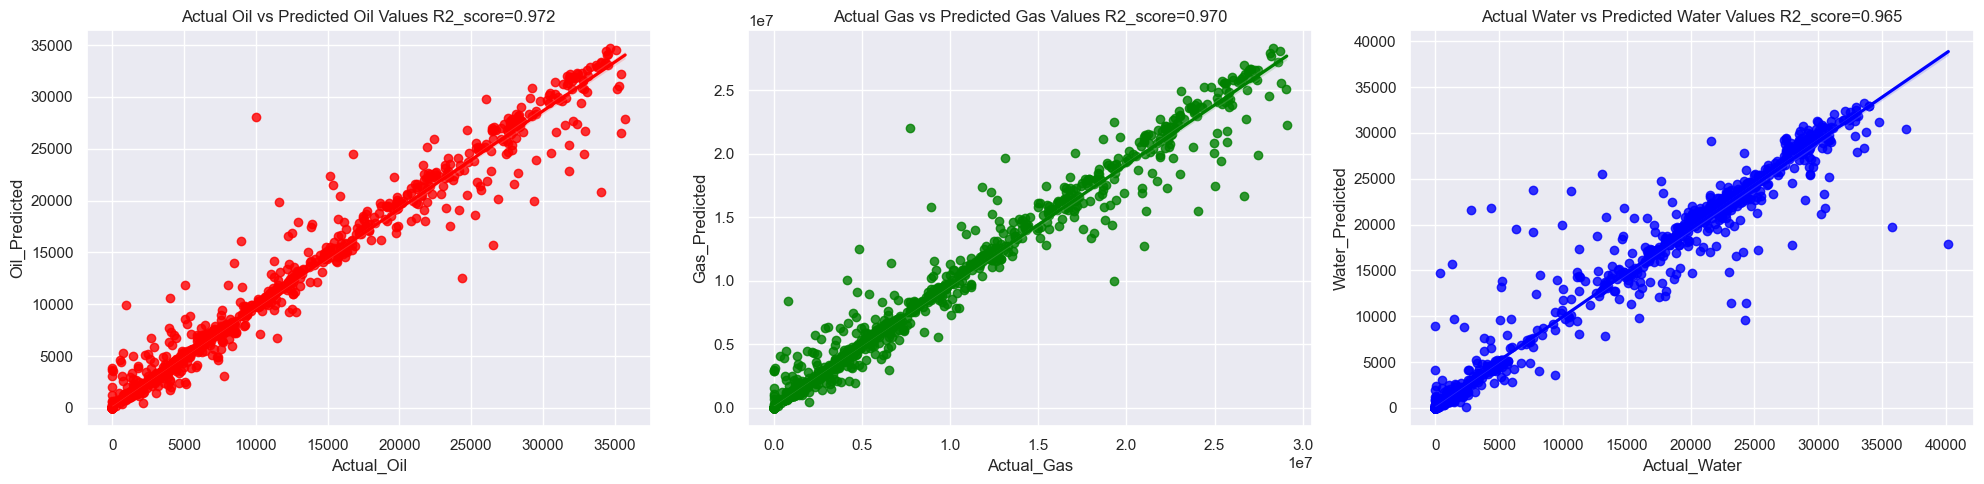

In [74]:
# Plot actual vs predicted values

plt.figure(figsize=(20, 5))
plt.subplot(131)
sns.regplot(x = joined_df['Actual_Oil'],  y = joined_df['Oil_Predicted'], color='red')
plt.xlabel("Actual_Oil")
plt.ylabel("Oil_Predicted")
plt.title(f"Actual Oil vs Predicted Oil Values R2_score={(oil_r2):.3f}")

plt.subplot(132)
sns.regplot (x = joined_df['Actual_Gas'],  y = joined_df['Gas_Predicted'], color= 'green' )
plt.xlabel("Actual_Gas")
plt.ylabel("Gas_Predicted")
plt.title(f"Actual Gas vs Predicted Gas Values R2_score={(gas_r2):.3f}")

plt.subplot(133)
sns.regplot (x = joined_df['Actual_Water'],  y = joined_df['Water_Predicted'], color= 'blue' )
plt.xlabel("Actual_Water")
plt.ylabel("Water_Predicted")
plt.title(f"Actual Water vs Predicted Water Values R2_score={(water_r2):.3f}")

plt.tight_layout()
plt.show()


<div id="7" style="background-color: #89B9AD88; padding: 12px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 32px;">
   🏁 Creating 'submission.csv'
    </h1>
</div>

In [75]:
#PREDICTION ON THE VALIDATION DATASET
validation_prediction = np.square (voting_model.predict(test) )


In [76]:
validation_prediction_df = pd.DataFrame ( validation_prediction , columns= column)
validation_prediction_df.head(20)

Oil_Predicted  Gas_Predicted  Water_Predicted
0     7707.474684   6.422407e+06      2019.295234
1    14830.653518   1.123809e+07       422.110474
2    13422.667529   1.053331e+07       382.422223
3    12462.244019   9.684420e+06        33.097744
4    11689.647749   9.767635e+06        34.284631
5    10728.612339   8.872784e+06        20.849680
6     4637.364899   3.505755e+06         9.954619
7     2287.545372   1.781647e+06         7.783871
8     1790.433449   1.419685e+06         6.770970
9     1934.530910   1.568854e+06         7.100312
10    1874.763150   1.577867e+06         5.926648
11    1869.960270   1.570615e+06         8.071453
12    1868.589353   1.543348e+06         7.865456
13    1671.835773   1.425797e+06        11.070240
14    1638.374280   1.330117e+06        13.912908
15    1592.976485   1.326956e+06        14.584421
16    1559.776812   1.269271e+06        15.184963
17    1381.420828   1.136908e+06        12.750963
18    1331.609079   1.111479e+06        12.842656
19    1303.916542   1.087733e+06        12.375131

In [77]:
validation_prediction_df.to_csv("Akimu_Odunola_2024_DSEATS_Datathon_5501001.csv",index=False,header=True)

<div id = "8" style="background-color: #89B9AD88; padding: 10px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 22px;">
    👋 Conclusion 
    </h1>
    <h3 style="font-family: 'Garamond', 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: center; color: #505050; line-height: 1.2; font-size: 18px;">
    The VotingRegressor showcases 96.8% accurracy in predicting our target variables<br>
    Machine Learning provides faster predicitions compared to traditional methods <br>
    </h3>
</div>
